<a href="https://colab.research.google.com/github/Rociosamudio/Machine-Learning-Data-Science-II/blob/main/actividad_pr%C3%A1ctica_APIS_%22LizRocio_SamudioRuiz%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biblioteca

In [491]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# !pip install scikit-learn


#Introduccion

Este dataset contiene datos de cuanta energia se produce a partir de diferentes fuentes, cuenta con datos de preccios y la carga total desde el 2015 hasta el 2018.
 Al comprender las relaciones entre estos factores, podremos anticipar con mayor precisión la demanda energética, lo que permitirá optimizar la planificación de la producción y distribución de energía, y así lograr una gestión más eficiente de los recursos.
 Teniendo en cuenta estos datos tengo las siguientes hipotesis.

- La primera teoria es que la energia solar es la energia que mas se consume dentro de las renovables y dentro de las fosiles es el gas ya que los avances tecnológicos han permitido una mayor eficiencia en la captación y conversión de esta energía.

- La segunda es que existe una relacion lineal positiva entre la prevision ed carga total de energia y la carga real, entonces de esta manera decimos que si la previsión que se va a necesitar es alta, entonces la cantidad real de energía que se consuma también será alta, y viceversa. Considero esta hipotesis debido a que si la gente consume mucha energia se debe preveer de antemano el consumo.

-  Otra de las hipotesis que me surgen es que existe una correlacion entre la  generación de energía solar y la generación de energía eólica terrestre, donde los días con mayor generación solar también tienden a tener mayor generación eólica, y es posible que se generen condiciones atmosféricas que también favorezcan la generación de viento los dias de radiacion solar.
Aunque no implica necesariamente una correlación directa, sí sugiere que en ciertas ubicaciones se pueden aprovechar ambas fuentes de manera simultánea.

- Mi siguiente hipotesis, Si se espera que la demanda de energía sea alta, se utiliza más energía fósil para satisfacer esa demanda.

- Por ultimo es una propuesta para Planificadores de Políticas Energéticas. Para desarrollar estrategias de integración de energías renovables y promover la transición hacia un sistema energético sostenible.
Ademas permite a los operadores de la red anticipar la disponibilidad de energía eólica y ajustar la generación de otras fuentes para mantener el equilibrio entre la oferta y la demanda.

 La generación de energía eólica, están influenciados por su comportamiento pasado, y un modelo que incorpore información historica será más preciso.


Para probar mis Hipotesis vamos al analisis de datos!!!


Dataset obtenido de
https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather?resource=download

In [492]:
ruta_archivo = '/content/drive/MyDrive/Data Science II Liz_Rocio_Samudio_Ruiz/2_energy_Datos.csv'

In [493]:
df = pd.read_csv(ruta_archivo)


In [494]:
df.shape #cantidad de filas y columnas

(35064, 31)

In [495]:
df.columns #noombre de las columnas

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'generation biomass ', 'ggeneration fossil oil'],
      dtype='object')

El nombre de las columnas de DF original me las trae en ingles, para mi personalmente es un poco mas practico en este caso traducirlas al español y renombrarlas.

In [496]:
traduccion = {
    'time': 'tiempo',
    'generation biomass': 'generación biomasa',
    'generation fossil brown coal/lignite': 'generación fósil carbón pardo/lignito',
    'generation fossil coal-derived gas': 'generación fósil gas derivado del carbón',
    'generation fossil gas': 'generación fósil gas',
    'generation fossil hard coal': 'generación fósil carbón duro',
    'generation fossil oil': 'generación fósil petróleo',
    'generation fossil oil shale': 'generación fósil esquisto bituminoso',
    'generation fossil peat': 'generación fósil turba',
    'generation geothermal': 'generación geotérmica',
    'generation hydro pumped storage aggregated': 'generación hidro bombeo almacenamiento agregado',
    'generation hydro pumped storage consumption': 'generación hidro bombeo almacenamiento consumo',
    'generation hydro run-of-river and poundage': 'generación hidro pasada por río y embalse',
    'generation hydro water reservoir': 'generación hidro embalse',
    'generation marine': 'generación marina',
    'generation nuclear': 'generación nuclear',
    'generation other': 'generación otra',
    'generation other renewable': 'generación otra renovable',
    'generation solar': 'generación solar',
    'generation waste': 'generación residuos',
    'generation wind offshore': 'generación eólica marina',
    'generation wind onshore': 'generación eólica terrestre',
    'forecast solar day ahead': 'previsión solar para el día siguiente',
    'forecast wind offshore eday ahead': 'previsión eólica marina para el día siguiente',
    'forecast wind onshore day ahead': 'previsión eólica terrestre para el día siguiente',
    'total load forecast': 'previsión de carga total',
    'total load actual': 'carga total real',
    'price day ahead': 'precio para el día siguiente',
    'price actual': 'precio real'
}

df = df.rename(columns=traduccion)# Renombrar las columnas del DataFrame
print(df.head())# Mostrar las primeras filas del DataFrame

                      tiempo  generación biomasa  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generación fósil carbón pardo/lignito  \
0                                  329.0   
1                                  328.0   
2                                  323.0   
3                                  254.0   
4                                  187.0   

   generación fósil gas derivado del carbón  generación fósil gas  \
0                                       0.0                4844.0   
1                                       0.0                5196.0   
2                                       0.0                4857.0   
3                                       0.0                4314.0   
4                                       0.0                4130.0   

   gene

In [497]:
print(df.dtypes)

tiempo                                               object
generación biomasa                                  float64
generación fósil carbón pardo/lignito               float64
generación fósil gas derivado del carbón            float64
generación fósil gas                                float64
generación fósil carbón duro                        float64
generación fósil petróleo                           float64
generación fósil esquisto bituminoso                float64
generación fósil turba                              float64
generación geotérmica                               float64
generación hidro bombeo almacenamiento agregado     float64
generación hidro bombeo almacenamiento consumo      float64
generación hidro pasada por río y embalse           float64
generación hidro embalse                            float64
generación marina                                   float64
generación nuclear                                  float64
generación otra                         

Observo que tiempo es una variable object y la pasare a formato date para poder conservar toda la información de tiempo e interpretar los resultados correctamente. Lo hare mas adelante por ahora avanzo en mis Datos nulos.

In [498]:
# Convierto la columna 'tiempo' a datetime64
df['tiempo'] = pd.to_datetime(df['tiempo'], utc=True)

#Verifica el nuevo tipo de dato
print(df['tiempo'].dtype)  # Debería mostrar datetime64[ns, UTC]

print(df['tiempo'].head(25))  # Muestra las primeras fechas para verificar la conversión

datetime64[ns, UTC]
0    2014-12-31 23:00:00+00:00
1    2015-01-01 00:00:00+00:00
2    2015-01-01 01:00:00+00:00
3    2015-01-01 02:00:00+00:00
4    2015-01-01 03:00:00+00:00
5    2015-01-01 04:00:00+00:00
6    2015-01-01 05:00:00+00:00
7    2015-01-01 06:00:00+00:00
8    2015-01-01 07:00:00+00:00
9    2015-01-01 08:00:00+00:00
10   2015-01-01 09:00:00+00:00
11   2015-01-01 10:00:00+00:00
12   2015-01-01 11:00:00+00:00
13   2015-01-01 12:00:00+00:00
14   2015-01-01 13:00:00+00:00
15   2015-01-01 14:00:00+00:00
16   2015-01-01 15:00:00+00:00
17   2015-01-01 16:00:00+00:00
18   2015-01-01 17:00:00+00:00
19   2015-01-01 18:00:00+00:00
20   2015-01-01 19:00:00+00:00
21   2015-01-01 20:00:00+00:00
22   2015-01-01 21:00:00+00:00
23   2015-01-01 22:00:00+00:00
24   2015-01-01 23:00:00+00:00
Name: tiempo, dtype: datetime64[ns, UTC]


In [499]:
print(df.dtypes)

tiempo                                              datetime64[ns, UTC]
generación biomasa                                              float64
generación fósil carbón pardo/lignito                           float64
generación fósil gas derivado del carbón                        float64
generación fósil gas                                            float64
generación fósil carbón duro                                    float64
generación fósil petróleo                                       float64
generación fósil esquisto bituminoso                            float64
generación fósil turba                                          float64
generación geotérmica                                           float64
generación hidro bombeo almacenamiento agregado                 float64
generación hidro bombeo almacenamiento consumo                  float64
generación hidro pasada por río y embalse                       float64
generación hidro embalse                                        

#Diccionario de Variables
**Generación de Electricidad por Fuente**

tiempo: Indica el período de tiempo al que corresponden los datos (hora, día, etc.).

generación biomasa: Cantidad de electricidad generada a partir de biomasa (materia orgánica renovable).

generación fósil carbón pardo/lignito: Electricidad generada con carbón de baja calidad (lignito).

generación fósil gas derivado del carbón: Electricidad generada a partir de gas sintético obtenido del carbón.

generación fósil gas: Electricidad generada con gas natural.

generación fósil carbón duro: Electricidad generada con carbón de alta calidad (antracita, hulla).

generación fósil petróleo: Electricidad generada con petróleo.

generación fósil esquisto bituminoso: Electricidad generada a partir de rocas sedimentarias que contienen materia orgánica.

generación fósil turba: Electricidad generada con turba (combustible fósil similar al carbón).

generación geotérmica: Electricidad generada a partir del calor natural de la Tierra.

generación hidro bombeo almacenamiento agregado: Electricidad generada por centrales hidroeléctricas que bombean agua a un embalse para su uso posterior.

generación hidro bombeo almacenamiento consumo: Similar a la anterior, pero enfocada en el consumo de energía para el bombeo.

generación hidro pasada por río y embalse: Electricidad generada por centrales hidroeléctricas convencionales.

generación hidro embalse: Electricidad generada por centrales hidroeléctricas que utilizan un embalse.

generación marina: Electricidad generada a partir de la energía de las olas, mareas o corrientes marinas.

generación nuclear: Electricidad generada en centrales nucleares.

generación otra: Electricidad generada a partir de otras fuentes no especificadas.

generación otra renovable: Electricidad generada a partir de otras fuentes renovables no especificadas.

generación solar: Electricidad generada a partir de la energía solar (fotovoltaica o térmica).

generación residuos: Electricidad generada a partir de la incineración de residuos.

generación eólica marina: Electricidad generada por parques eólicos marinos.

generación eólica terrestre: Electricidad generada por parques eólicos terrestres.

**Previsión y Datos de Generación Renovable**

previsión solar para el día siguiente: Predicción de la generación solar para el día siguiente.

previsión eólica marina para el día siguiente: Predicción de la generación eólica marina para el día siguiente.

previsión eólica terrestre para el día siguiente: Predicción de la generación eólica terrestre para el día siguiente.

**Carga y Precio de la Electricidad**

previsión de carga total: Predicción de la demanda total de electricidad.
carga total real: Demanda real de electricidad.

precio para el día siguiente: Precio de la electricidad para el día siguiente (puede variar según la hora).

precio real: Precio real de la electricidad.




In [500]:
df.head() # vemos las 5 primeras filas del DF, los nombres y tipos de datos que contiene

,tiempo,generación biomasa,generación fósil carbón pardo/lignito,generación fósil gas derivado del carbón,generación fósil gas,generación fósil carbón duro,generación fósil petróleo,generación fósil esquisto bituminoso,generación fósil turba,generación geotérmica,...,generación eólica terrestre,previsión solar para el día siguiente,previsión eólica marina para el día siguiente,previsión eólica terrestre para el día siguiente,previsión de carga total,carga total real,precio para el día siguiente,precio real,generation biomass,ggeneration fossil oil
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,NaN,NaN
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,NaN,NaN
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,NaN,NaN
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,NaN,NaN
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,NaN,NaN


In [501]:
df.tail()

,tiempo,generación biomasa,generación fósil carbón pardo/lignito,generación fósil gas derivado del carbón,generación fósil gas,generación fósil carbón duro,generación fósil petróleo,generación fósil esquisto bituminoso,generación fósil turba,generación geotérmica,...,generación eólica terrestre,previsión solar para el día siguiente,previsión eólica marina para el día siguiente,previsión eólica terrestre para el día siguiente,previsión de carga total,carga total real,precio para el día siguiente,precio real,generation biomass,ggeneration fossil oil
35059,2018-12-31 18:00:00+00:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02,NaN,NaN
35060,2018-12-31 19:00:00+00:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16,NaN,NaN
35061,2018-12-31 20:00:00+00:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30,NaN,NaN
35062,2018-12-31 21:00:00+00:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89,NaN,NaN
35063,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88,NaN,NaN


In [502]:
df.describe() # muestra un resumen estadístico de las columnas numéricas DF


,generación biomasa,generación fósil carbón pardo/lignito,generación fósil gas derivado del carbón,generación fósil gas,generación fósil carbón duro,generación fósil petróleo,generación fósil esquisto bituminoso,generación fósil turba,generación geotérmica,generación hidro bombeo almacenamiento agregado,...,generación eólica terrestre,previsión solar para el día siguiente,previsión eólica marina para el día siguiente,previsión eólica terrestre para el día siguiente,previsión de carga total,carga total real,precio para el día siguiente,precio real,generation biomass,ggeneration fossil oil
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,34821.000000,35046.0,35046.0,35046.0,0.0,...,35046.000000,35064.000000,0.0,35064.000000,35064.000000,34580.000000,35064.000000,35064.000000,0.0,0.0
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.337210,0.0,0.0,0.0,NaN,...,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28697.198265,49.874341,57.884023,NaN,NaN
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.539683,0.0,0.0,0.0,NaN,...,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4573.106858,14.618900,14.204083,NaN,NaN
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000,NaN,NaN
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,2933.000000,69.000000,NaN,2979.000000,24793.750000,24811.750000,41.490000,49.347500,NaN,NaN
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,4849.000000,576.000000,NaN,4855.000000,28906.000000,28900.000000,50.520000,58.020000,NaN,NaN
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32193.000000,60.530000,68.010000,NaN,NaN
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000,NaN,NaN


Hasta aqui vemos diferentes fuentes de generación de energía y cuanta energia se genero a partir de cada fuente. Ademas de otros datos relevantes como el precio. Datos recolectaodos durante 3 años, con horarios y fechas desde el 2015 al 2018.

Se púede hacer las siguientes OBS en una primera mirada:
- Hay mas dependencia de los combustibles fosiles (carbón, gas, petróleo) tiene valores promedio y máximos significativamente más altos que las fuentes renovables.
-La generacion Hidroelectrica, muestrra valores considerables como fuente de energía y posible apoyo para la gestión de la demanda.
- LA fuente renovable fuente marina, terrestre y la solar muestran valores que sugieren un potencial de crecimiento importante. Sus valores promedio son más bajos,tabine esto indica una menor contribución a la generación del total.



In [503]:
df.isnull().values.any()

np.True_

In [504]:
print(df.isnull().sum())

tiempo                                                  0
generación biomasa                                     19
generación fósil carbón pardo/lignito                  18
generación fósil gas derivado del carbón               18
generación fósil gas                                   18
generación fósil carbón duro                           18
generación fósil petróleo                             243
generación fósil esquisto bituminoso                   18
generación fósil turba                                 18
generación geotérmica                                  18
generación hidro bombeo almacenamiento agregado     35064
generación hidro bombeo almacenamiento consumo         19
generación hidro pasada por río y embalse              19
generación hidro embalse                               18
generación marina                                     219
generación nuclear                                     17
generación otra                                        18
generación otr

In [505]:
df.eq(0).sum()

,0
tiempo,0
generación biomasa,4
generación fósil carbón pardo/lignito,10517
generación fósil gas derivado del carbón,35046
generación fósil gas,1
generación fósil carbón duro,3
generación fósil petróleo,3
generación fósil esquisto bituminoso,35046
generación fósil turba,35046
generación geotérmica,35046


#Visualizacion de Nulos




<Axes: >

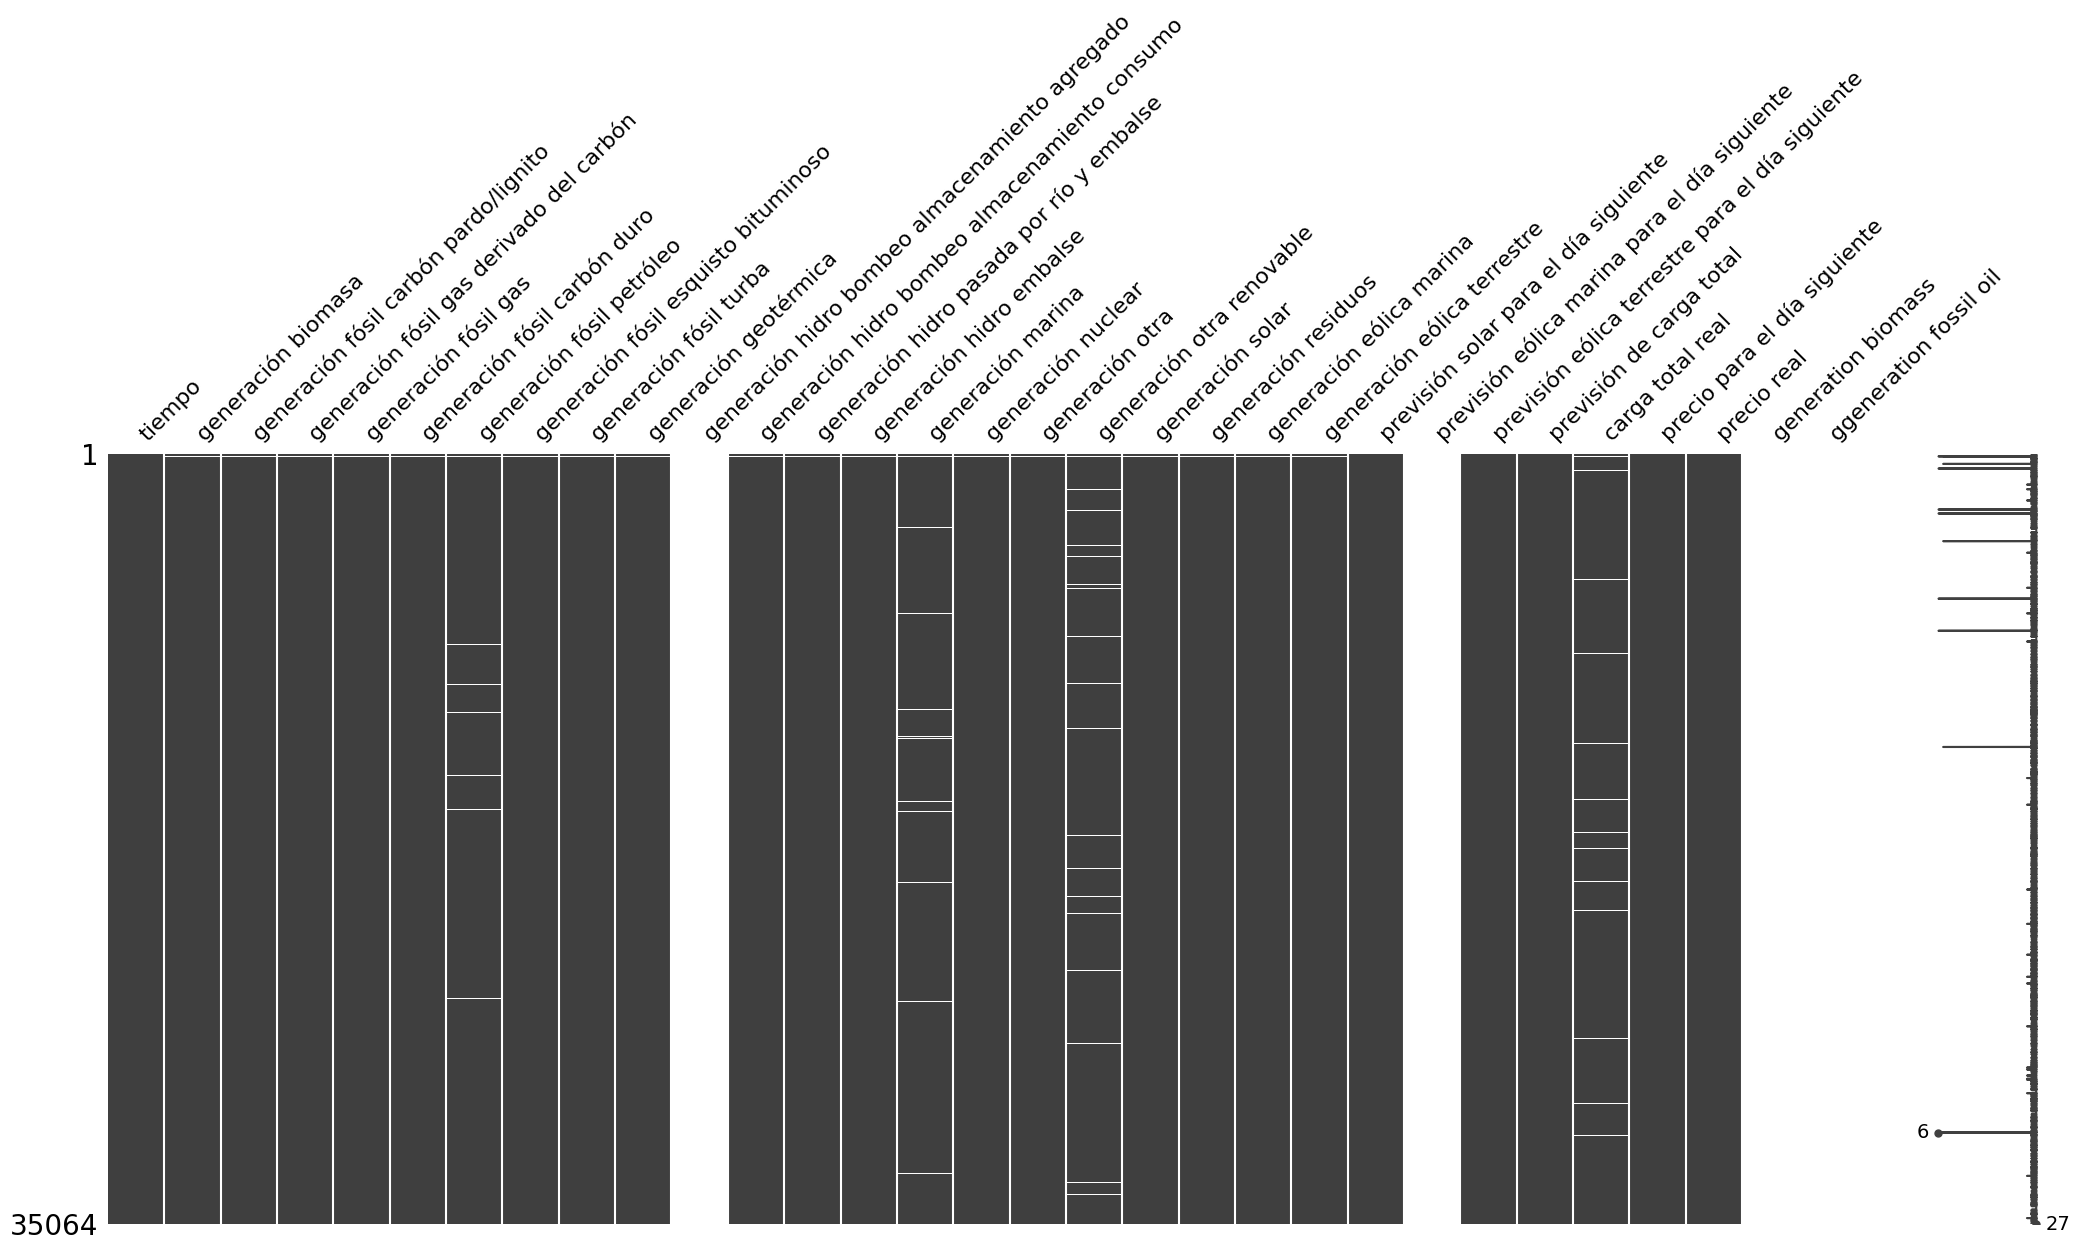

In [506]:
msno.matrix(df)

Con esta matrix de msmo se ve a simple vista las Columnas vacias, que considero que podria estar faltando por Error de registro, o datos no disponible0s. al ver que estan vacias por completo las voy a eliminar de mi Dataframe.

Los valores nulos de generación fósil petróleo que tiene 243 valores faltantes que las voy a reemplazar con la mediana porque la distribución general de los datos no son muy altos o muy bahos a diferencia del promedio.

Valores faltantes en generacion marina me encuentro en una duda con esto para tomar una decision debido a que podria ser un errores de medicion o no hubo generacion en esos periodos. Eliminar estos datos podria sesgar el analisis, voy a realizar un grafico comparativo del df actual y otra con el reemplazo por la mediana. De acuerdo a eso tomare la decision.

Generacion otra renovable no tiene valores extremos, lo voy a reemplazar por la mediana. algunas filas pueden ser menos relevantes, aunque eliminar estos datos  puede afectar a la prediccion.





#Paleta de colores

In [507]:
def establecer_paleta_magma():
    """Establece la paleta de colores magma"""
    sns.set_palette("magma")  # Establecer la paleta de seaborn
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette("magma"))  # Establecer la paleta de matplotlib

##1 Reemplazo de nulos

<ipython-input-508-f7a396c0718d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='generación fósil petróleo', data=df, palette=['#D05C62', '#B41E53', '#8A0868', '#5E0881', '#33006F'])
<ipython-input-508-f7a396c0718d>:4: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.boxplot(y='generación fósil petróleo', data=df, palette=['#D05C62', '#B41E53', '#8A0868', '#5E0881', '#33006F'])


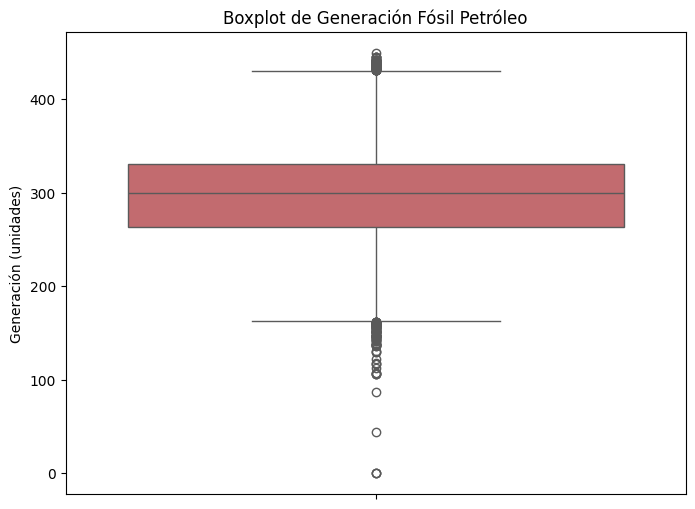

In [508]:
#Boxplot para revisar el reemplazo de nulos de generacion fosil

plt.figure(figsize=(8, 6))
sns.boxplot(y='generación fósil petróleo', data=df, palette=['#D05C62', '#B41E53', '#8A0868', '#5E0881', '#33006F'])
plt.title('Boxplot de Generación Fósil Petróleo')
plt.ylabel('Generación (unidades)')
plt.show()


Observando este grafico, imputo con mas seguridad los nulos con la mediana, que segun el describe se veia mas robusto y no se vera tan afectada.

In [509]:
# Calculo de la mediana
mediana_petroleo = df['generación fósil petróleo'].median()

# Reemplazo los valores nulos por la mediana
df['generación fósil petróleo'].fillna(mediana_petroleo, inplace=True)

<ipython-input-509-bb44c1068492>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['generación fósil petróleo'].fillna(mediana_petroleo, inplace=True)


## 2 Reemplazo de nulos

<ipython-input-510-19b988319fbe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['generación marina'].fillna(mediana_marina, inplace=True)


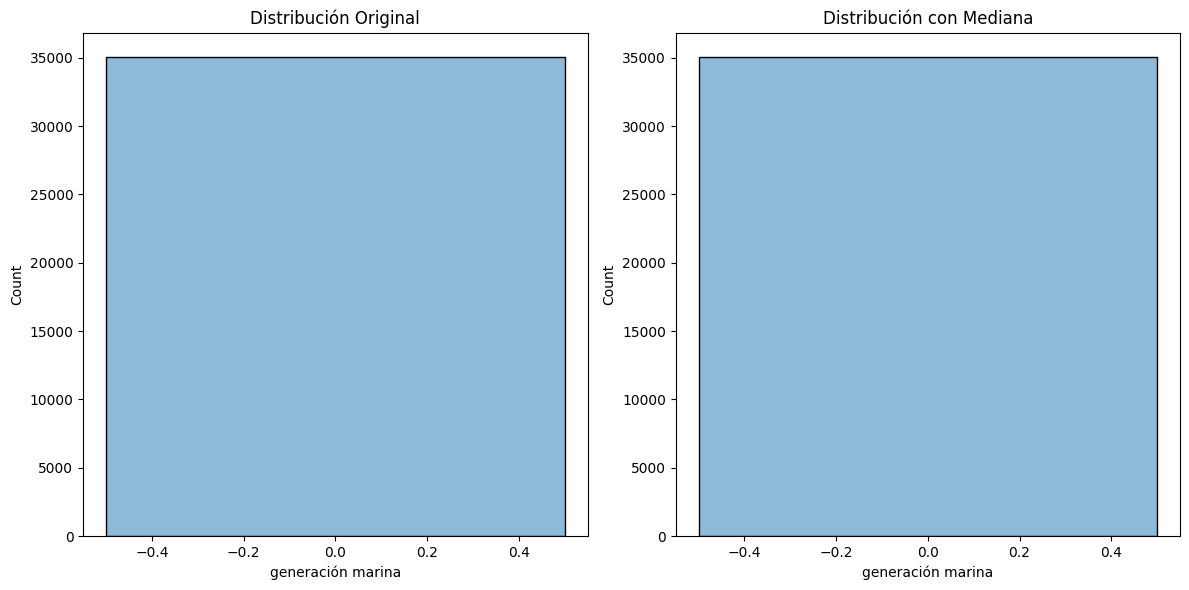

In [510]:

# Imputación de valores faltantes en 'generación marina'
mediana_marina = df['generación marina'].median()
df['generación marina'].fillna(mediana_marina, inplace=True)

# Gráfico de comparación (opcional, para visualizar el cambio)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subgráfico de Distribución original
sns.histplot(df['generación marina'], kde=True)
plt.title('Distribución Original')

plt.subplot(1, 2, 2)  # Subgráfico de Distribución con mediana
sns.histplot(df['generación marina'], kde=True)
plt.title('Distribución con Mediana')

plt.tight_layout()  # Ajusta los subgráficos para que no se superpongan
plt.show()


LA distribucion original sugiere que la mayoria de los datos son iguales o parecidos. es por esto que la mediana seria un valor mas representativo apra imputar los nulos.

In [511]:
# Calculo de la mediana de
mediana_marina = df['generación marina'].median()

# Reemplazo los valores nulos por la mediana
df['generación marina'].fillna(mediana_marina, inplace=True)

<ipython-input-511-81d8a5f4d68f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['generación marina'].fillna(mediana_marina, inplace=True)


## 3 Reemplazo de nulos

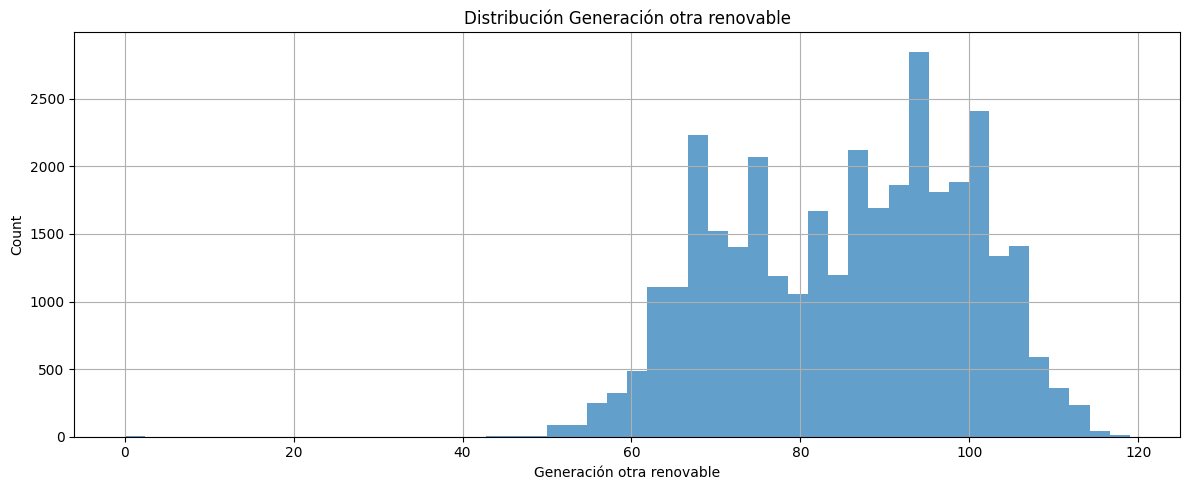

In [512]:
# Figura y subplots
fig, ax = plt.subplots(figsize=(12, 5))

# Graficar la distribución de 'generación otra renovable'
df['generación otra renovable'].hist(ax=ax, bins=50, alpha=0.7, label='Generación otra renovable')
ax.set_title('Distribución Generación otra renovable')
ax.set_xlabel('Generación otra renovable')
ax.set_ylabel('Count')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

La generación de energía renovable de tipo "otra" tiende a concentrarse en dos rangos principales de valores.

Es posible que haya dos tipos diferentes de fuentes de energía renovable "otra" que producen diferentes niveles de generación.7

Los valores atípicos en el extremo inferior del eje X podrían requerir una investigación adicional, como no me influye en mi variable objetivo solo rellenare los nulos con la mediana y la dejare ahi.

In [513]:
# Resumen estadístico de la columna 'generación otra renovable'
descripcion_generacion_otra_renovable = df['generación otra renovable'].describe()

print(descripcion_generacion_otra_renovable)

count    34411.000000
mean        85.615850
std         14.077818
min          0.000000
25%         73.000000
50%         88.000000
75%         97.000000
max        119.000000
Name: generación otra renovable, dtype: float64


Relleno mis valores nulos con la mediana, ya que esta es menos sensible a los valores atipicos.

In [514]:
# Calcula la mediana
mediana_generacion_otra_renovable = df['generación otra renovable'].median()

# Relleno los valores nulos con la mediana
df['generación otra renovable'].fillna(mediana_generacion_otra_renovable, inplace=True)

print(df['generación otra renovable'].isnull().sum()) #debe dar 0

0


<ipython-input-514-19b5a78548e4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['generación otra renovable'].fillna(mediana_generacion_otra_renovable, inplace=True)


## 4 Reemplazo de nulos

En la columna carga total real faltan 484 valores, lo que representa el 1.38% en mis datos es por esto que hare un histograma para poder tomar una desicion con mis nulos

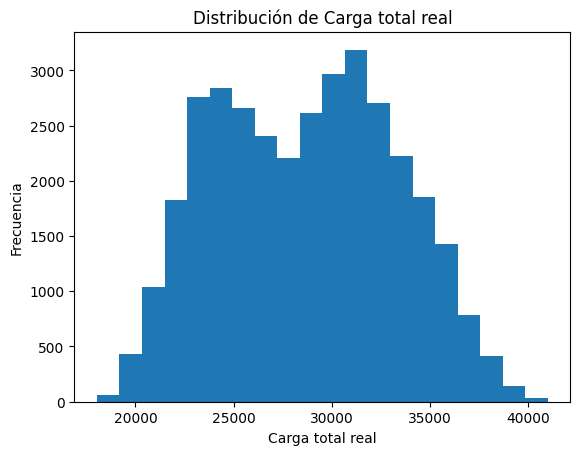

In [515]:
# histograma para ver como me conviene imputar los datos
plt.hist(df['carga total real'], bins=20)  # Ajusto el número de bins a necesidad
plt.xlabel('Carga total real')
plt.ylabel('Frecuencia')
plt.title('Distribución de Carga total real')
plt.show()

Voy a utilizar la mediana para reemplazar los nulos de esta columnas. Al usar la mediana, me aseguro de que el valor de reemplazo sea representativo del "centro" de los datos aunque esta sea bimodal.

Utilizo una copia al principio para ver como se distribuye

<ipython-input-516-efe436418a46>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['carga total real'].fillna(mediana_carga_total_real, inplace=True)


0


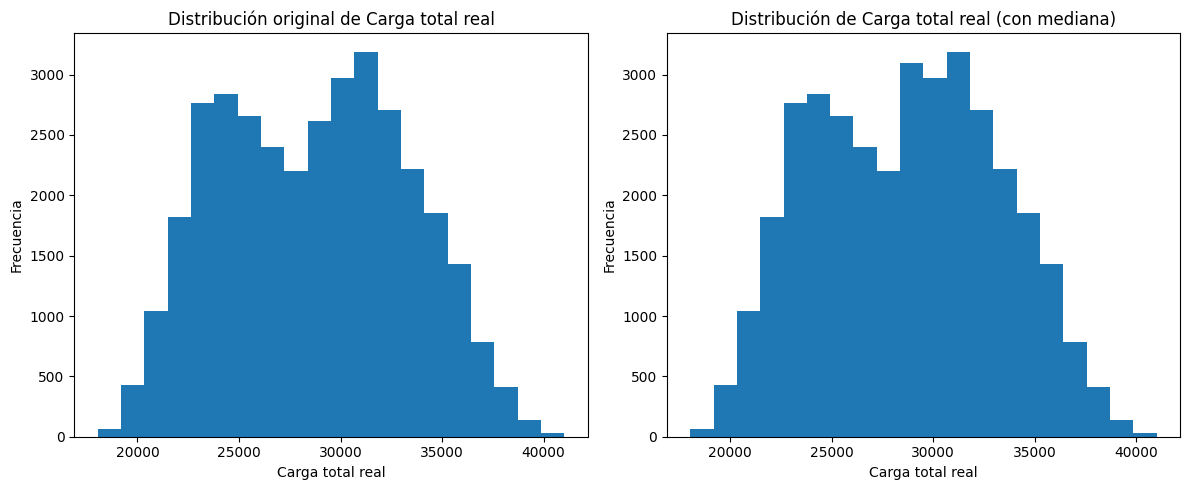

In [516]:
# Crea una copia del DataFrame original
df_copy = df.copy()

# Calcula la mediana de la columna 'carga total real' en la copia
mediana_carga_total_real = df_copy['carga total real'].median()

# Imputa los valores nulos con la mediana en la copia
df_copy['carga total real'].fillna(mediana_carga_total_real, inplace=True)

# Verificar que no queden valores nulos en la copia
print(df_copy['carga total real'].isnull().sum())  # Debería imprimir 0

# Crea la figura y los subplots para los histogramas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grafica el histograma de la distribución original
axes[0].hist(df['carga total real'], bins=20)  # Ajusta el número de bins según sea necesario
axes[0].set_xlabel('Carga total real')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución original de Carga total real')

# Grafica el histograma de la distribución con la mediana imputada
axes[1].hist(df_copy['carga total real'], bins=20)  # Ajusta el número de bins según sea necesario
axes[1].set_xlabel('Carga total real')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Carga total real (con mediana)')

# Muestra los histogramas
plt.tight_layout()  # Ajusta los subplots para que no se superpongan
plt.show()

La distribución resultante conserva las características principales de la distribución original, lo que sugiere que la mediana es una medida de tendencia central adecuada. avanzo en reemplazar mis datos en mi df orignal

In [517]:
# Imputo los valores nulos en la columna 'Distribución de Carga total'
# Calculo la mediana SOLO para esa columna
mediana_carga_total = df['carga total real'].median()
# Reemplazar los nulos
df['carga total real'].fillna(mediana_carga_total, inplace=True)

# Verifica que no queden valores nulos en esa columna
print(df['carga total real'].isnull().sum())  # Debería imprimir 0



0


<ipython-input-517-8db5bde65494>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['carga total real'].fillna(mediana_carga_total, inplace=True)


#Eliminar Columnas Vacias

In [518]:
#reviso con if else para eliminar esta columna
if "generación hidro bombeo almacenamiento agregado" in df.columns:
    df = df.drop(columns=["generación hidro bombeo almacenamiento agregado"])
    print("Columna 'generación hidro bombeo almacenamiento agregado' eliminada.")
else:
    print("La columna 'generación hidro bombeo almacenamiento agregado' ya no está en el DataFrame.")

# Verifica que la columna haya sido eliminada (o si ya no estaba)
print(df.columns)

Columna 'generación hidro bombeo almacenamiento agregado' eliminada.
Index(['tiempo', 'generación biomasa', 'generación fósil carbón pardo/lignito',
       'generación fósil gas derivado del carbón', 'generación fósil gas',
       'generación fósil carbón duro', 'generación fósil petróleo',
       'generación fósil esquisto bituminoso', 'generación fósil turba',
       'generación geotérmica',
       'generación hidro bombeo almacenamiento consumo',
       'generación hidro pasada por río y embalse', 'generación hidro embalse',
       'generación marina', 'generación nuclear', 'generación otra',
       'generación otra renovable', 'generación solar', 'generación residuos',
       'generación eólica marina', 'generación eólica terrestre',
       'previsión solar para el día siguiente',
       'previsión eólica marina para el día siguiente',
       'previsión eólica terrestre para el día siguiente',
       'previsión de carga total', 'carga total real',
       'precio para el día siguien

In [519]:
# Elimina la columna del DataFrame ggeneration fossil oil
df = df.drop(columns=["ggeneration fossil oil"])
print(df.columns)

Index(['tiempo', 'generación biomasa', 'generación fósil carbón pardo/lignito',
       'generación fósil gas derivado del carbón', 'generación fósil gas',
       'generación fósil carbón duro', 'generación fósil petróleo',
       'generación fósil esquisto bituminoso', 'generación fósil turba',
       'generación geotérmica',
       'generación hidro bombeo almacenamiento consumo',
       'generación hidro pasada por río y embalse', 'generación hidro embalse',
       'generación marina', 'generación nuclear', 'generación otra',
       'generación otra renovable', 'generación solar', 'generación residuos',
       'generación eólica marina', 'generación eólica terrestre',
       'previsión solar para el día siguiente',
       'previsión eólica marina para el día siguiente',
       'previsión eólica terrestre para el día siguiente',
       'previsión de carga total', 'carga total real',
       'precio para el día siguiente', 'precio real', 'generation biomass '],
      dtype='object')


In [520]:

# Elimina la columna del DataFrame revisión eólica marina para el día siguiente
df = df.drop(columns=["previsión eólica marina para el día siguiente"])

print(df.columns)

Index(['tiempo', 'generación biomasa', 'generación fósil carbón pardo/lignito',
       'generación fósil gas derivado del carbón', 'generación fósil gas',
       'generación fósil carbón duro', 'generación fósil petróleo',
       'generación fósil esquisto bituminoso', 'generación fósil turba',
       'generación geotérmica',
       'generación hidro bombeo almacenamiento consumo',
       'generación hidro pasada por río y embalse', 'generación hidro embalse',
       'generación marina', 'generación nuclear', 'generación otra',
       'generación otra renovable', 'generación solar', 'generación residuos',
       'generación eólica marina', 'generación eólica terrestre',
       'previsión solar para el día siguiente',
       'previsión eólica terrestre para el día siguiente',
       'previsión de carga total', 'carga total real',
       'precio para el día siguiente', 'precio real', 'generation biomass '],
      dtype='object')


In [521]:
# Elimina la columna del DataFrame generation biomass
df = df.drop(columns=["generation biomass "])
print(df.columns)

Index(['tiempo', 'generación biomasa', 'generación fósil carbón pardo/lignito',
       'generación fósil gas derivado del carbón', 'generación fósil gas',
       'generación fósil carbón duro', 'generación fósil petróleo',
       'generación fósil esquisto bituminoso', 'generación fósil turba',
       'generación geotérmica',
       'generación hidro bombeo almacenamiento consumo',
       'generación hidro pasada por río y embalse', 'generación hidro embalse',
       'generación marina', 'generación nuclear', 'generación otra',
       'generación otra renovable', 'generación solar', 'generación residuos',
       'generación eólica marina', 'generación eólica terrestre',
       'previsión solar para el día siguiente',
       'previsión eólica terrestre para el día siguiente',
       'previsión de carga total', 'carga total real',
       'precio para el día siguiente', 'precio real'],
      dtype='object')


In [522]:
df.shape #cantidad de filas y columnas

(35064, 27)

#Check nulos

<Axes: >

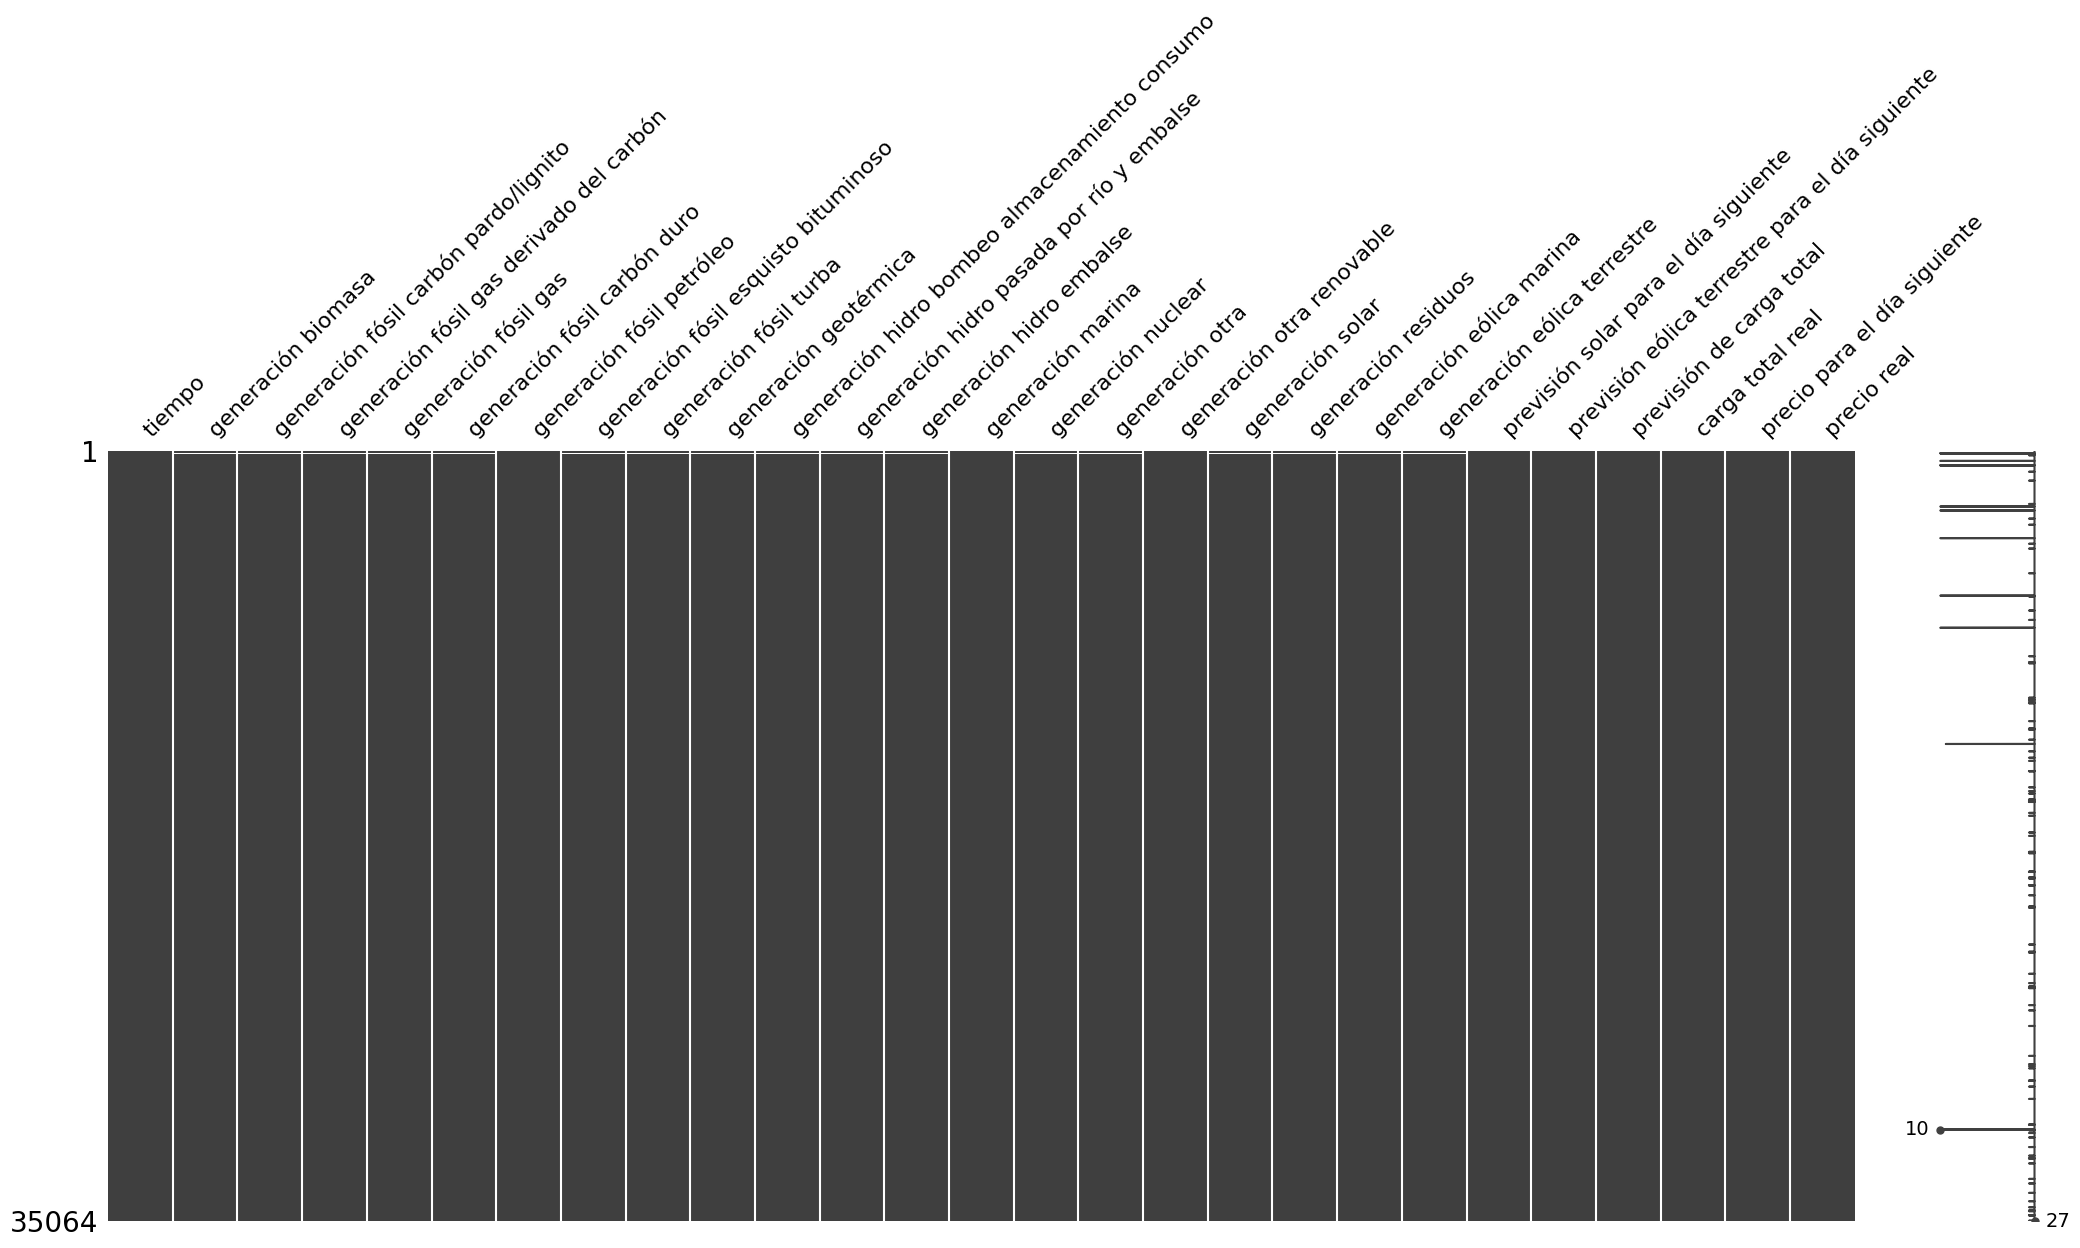

In [523]:
msno.matrix(df)

Porcentaje de nulos por reemplazar y cantidad

In [524]:
# Calcula la cantidad de valores nulos por columna
cantidad_nulos = df.isnull().sum()

# Calcula el porcentaje de valores nulos por columna
porcentaje_nulos = (cantidad_nulos / len(df)) * 100

# Crea un DataFrame para mostrar la cantidad y el porcentaje de nulos
resultados_nulos = pd.DataFrame({'Cantidad de nulos': cantidad_nulos, 'Porcentaje de nulos': porcentaje_nulos})

# Imprime el resultado
print(resultados_nulos)

                                                  Cantidad de nulos  \
tiempo                                                            0   
generación biomasa                                               19   
generación fósil carbón pardo/lignito                            18   
generación fósil gas derivado del carbón                         18   
generación fósil gas                                             18   
generación fósil carbón duro                                     18   
generación fósil petróleo                                         0   
generación fósil esquisto bituminoso                             18   
generación fósil turba                                           18   
generación geotérmica                                            18   
generación hidro bombeo almacenamiento consumo                   19   
generación hidro pasada por río y embalse                        19   
generación hidro embalse                                         18   
genera

Feliz, Dataset sin nulos. Profe me costo un monton!! Avisame si tengo que borrar mis comentarios ;D

In [525]:
# Lista de columnas con nulos
columnas_con_nulos = ['generación biomasa', 'generación fósil carbón pardo/lignito',
                     'generación fósil gas derivado del carbón', 'generación fósil gas',
                     'generación fósil carbón duro', 'generación fósil esquisto bituminoso',
                     'generación fósil turba', 'generación geotérmica',
                     'generación hidro bombeo almacenamiento consumo',
                     'generación hidro pasada por río y embalse', 'generación hidro embalse',
                     'generación nuclear', 'generación otra', 'generación solar',
                     'generación residuos', 'generación eólica marina',
                     'generación eólica terrestre']

#Itera sobre las columnas con nulos
for columna in columnas_con_nulos:
    #Calcula la mediana de la columna
    mediana = df[columna].median()
    # Reemplaza los valores nulos en la columna con la mediana
    df[columna].fillna(mediana, inplace=True)

#Verificamos que no queden valores nulos en las columnas especificadas
print(df[columnas_con_nulos].isnull().sum())  # Debería imprimir 0 para cada columna



generación biomasa                                0
generación fósil carbón pardo/lignito             0
generación fósil gas derivado del carbón          0
generación fósil gas                              0
generación fósil carbón duro                      0
generación fósil esquisto bituminoso              0
generación fósil turba                            0
generación geotérmica                             0
generación hidro bombeo almacenamiento consumo    0
generación hidro pasada por río y embalse         0
generación hidro embalse                          0
generación nuclear                                0
generación otra                                   0
generación solar                                  0
generación residuos                               0
generación eólica marina                          0
generación eólica terrestre                       0
dtype: int64


<ipython-input-525-6b5bb2aa49c0>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columna].fillna(mediana, inplace=True)


Considero que al dividir mis datos en energia renovable y fosiles puedo hacer una comparativa mas eficiente, y desde aqui probar una de mis hipotesis que la energia solar es la energia que mas se consume dentro de las renovables y dentro de las fosiles es el gas.

#Analisis Univariado

## Energia renovable
 Quisiera una visión general de la distribución y las características de la generación de energía renovable en mi conjunto de datos. PAra ello busco ver mediante histogramas la distribucion de los datos y si hay sesgos. y posterior un Top 5 de las energias mas utilizadas, probando mi hipotesis de que la energia solar es la que mas se consume dentro de este rango.

Estadísticas descriptivas para la generación de energía renovable:
       generación biomasa  generación geotérmica  \
count        35064.000000                35064.0   
mean           383.504592                    0.0   
std             85.331679                    0.0   
min              0.000000                    0.0   
25%            333.000000                    0.0   
50%            367.000000                    0.0   
75%            433.000000                    0.0   
max            592.000000                    0.0   

       generación hidro bombeo almacenamiento consumo  \
count                                    35064.000000   
mean                                       475.356491   
std                                        792.248672   
min                                          0.000000   
25%                                          0.000000   
50%                                         68.000000   
75%                                        615.000000   
max     

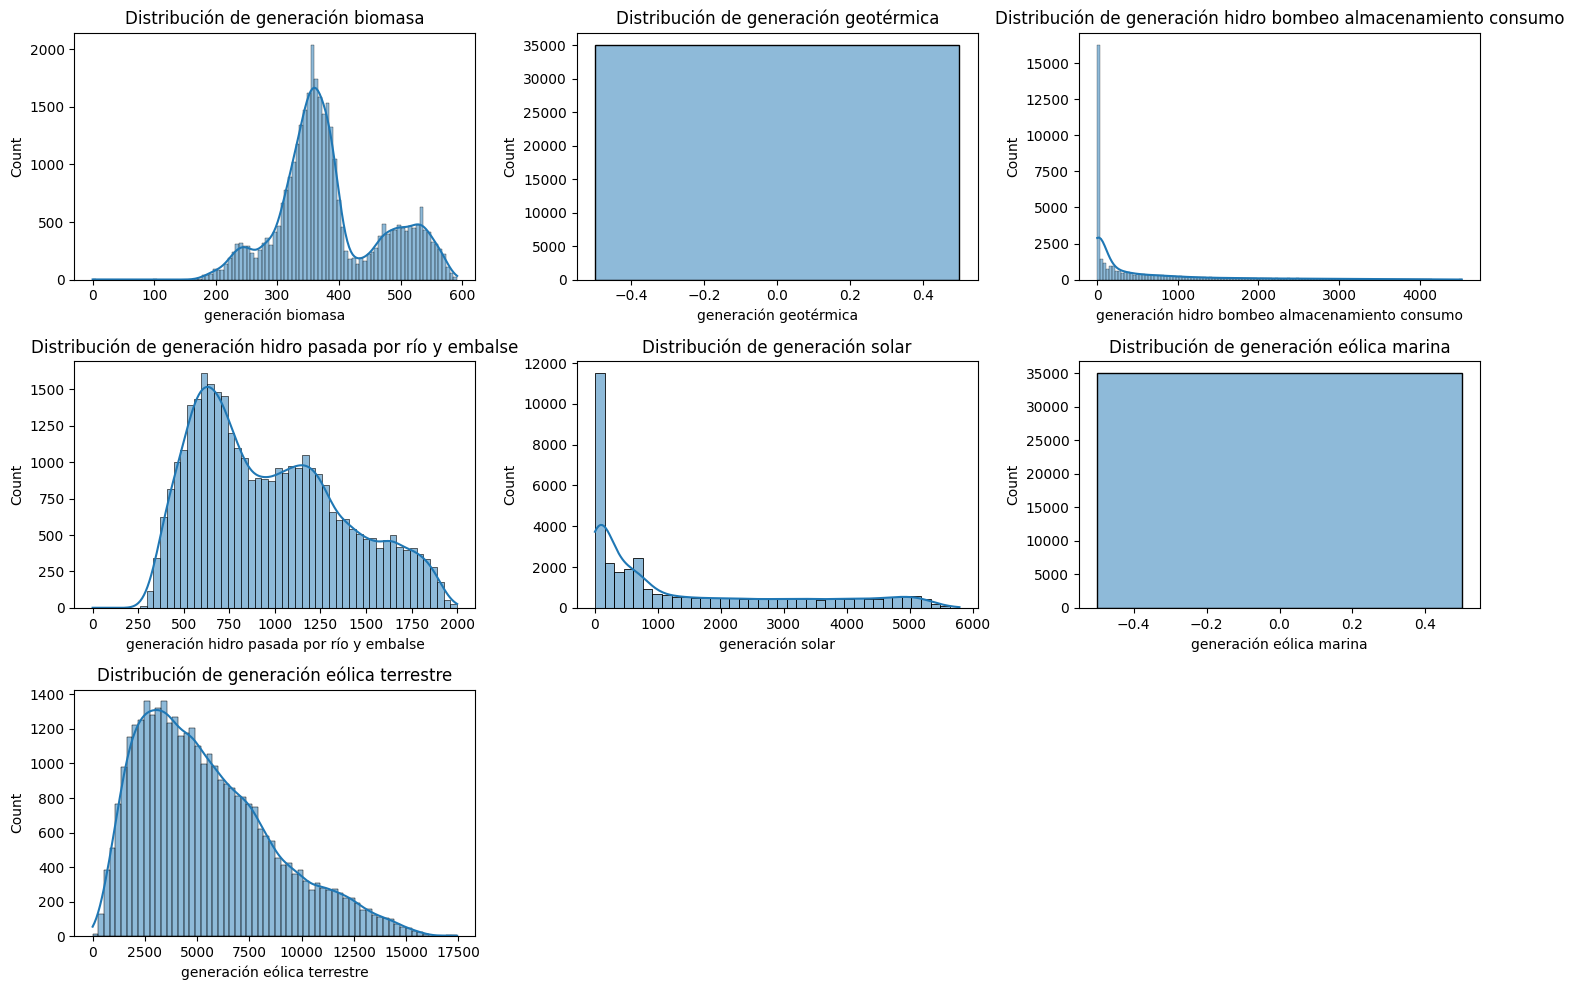

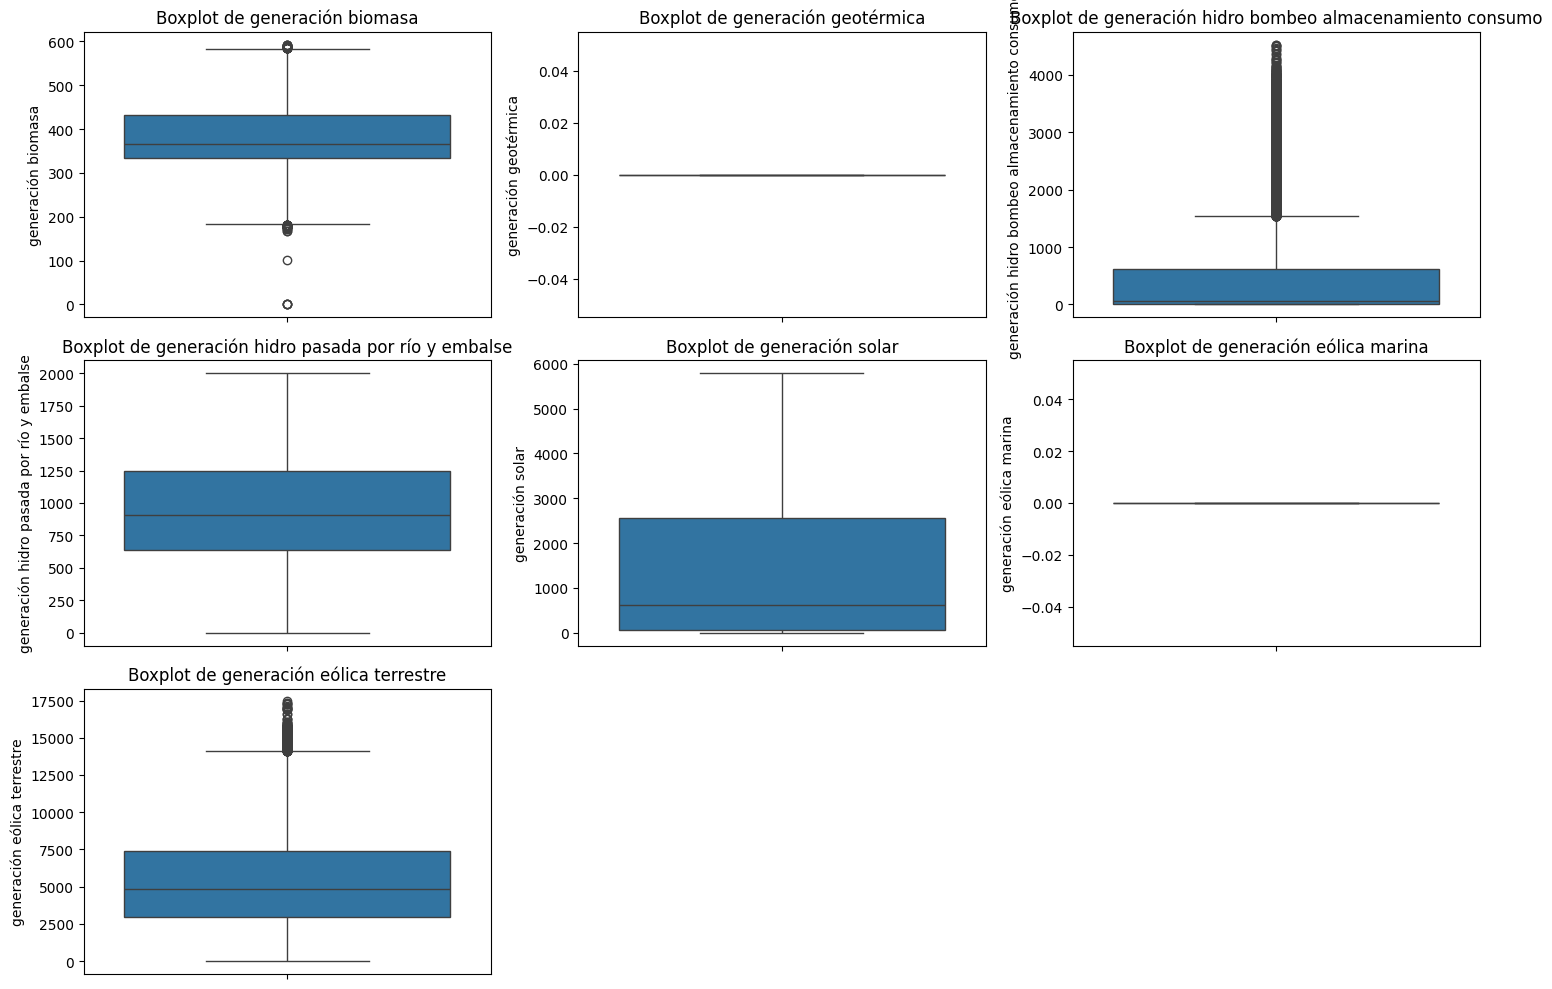

In [526]:
# Columnas de generación de energía renovable
renewable_columns = [
    'generación biomasa',
    'generación geotérmica',
    'generación hidro bombeo almacenamiento consumo',
    'generación hidro pasada por río y embalse',
    'generación solar',
    'generación eólica marina',
    'generación eólica terrestre',

]

# Calcular estadísticas descriptivas para cada columna de generación renovable
descriptive_stats = df[renewable_columns].describe()

print("Estadísticas descriptivas para la generación de energía renovable:")
print(descriptive_stats)

# Crear histogramas para cada columna de generación renovable
plt.figure(figsize=(15, 10))
for i, column in enumerate(renewable_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

# Crear boxplots para cada columna de generación renovable
plt.figure(figsize=(15, 10))
for i, column in enumerate(renewable_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

 Generación Geotérmica y Eólica Marina, muestran una generación constante en 0. Esto sugiere que estas fuentes de energía renovable no están contribuyendo a la generación de energía en el conjunto de datos.

 Generación Hidro Bombeo Almacenamiento Consumo, Solar y Eólica Terrestre: Estos tres boxplots muestran distribuciones sesgadas a la derecha con valores atípicos altos. Esto indica que la generación de energía de estas fuentes es variable y que hay momentos en los que la generación es excepcionalmente alta.


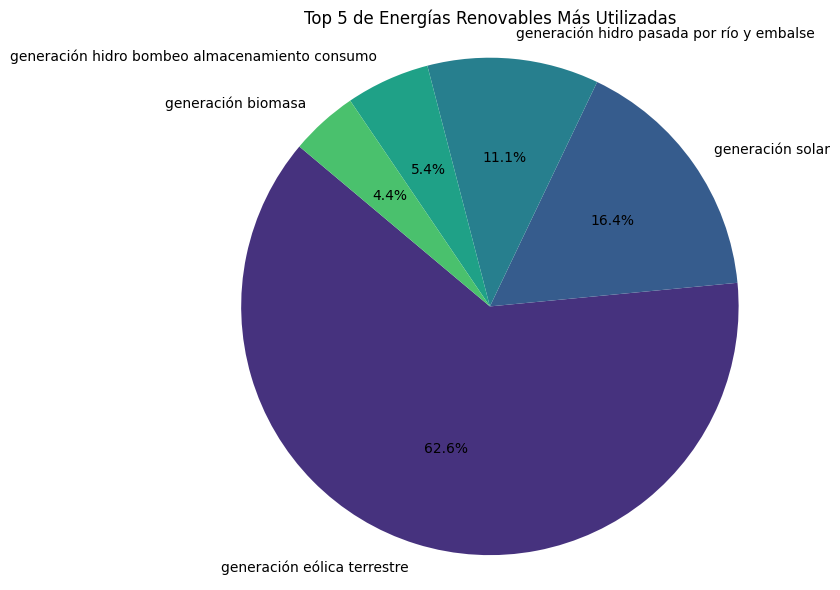

In [527]:
# Columnas de generación de energía renovable
renewable_columns = [
    'generación biomasa',
    'generación geotérmica',
    'generación hidro bombeo almacenamiento consumo',
    'generación hidro pasada por río y embalse',
    'generación solar',
    'generación eólica marina',
    'generación eólica terrestre',
]

df_renewable = df.copy()


# Calcular la generación total de cada tipo de energía renovable
generation_totals = df_renewable[renewable_columns].sum()

# Crear un DataFrame para facilitar la ordenación
generation_df = pd.DataFrame({'Energía': generation_totals.index, 'Generación Total': generation_totals.values})

# Ordenar de mayor a menor generación
top_5_generation = generation_df.nlargest(5, 'Generación Total')

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(top_5_generation['Generación Total'], labels=top_5_generation['Energía'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Top 5 de Energías Renovables Más Utilizadas')
plt.axis('equal')  # Equal aspect ratio asegura que la torta se dibuje como un círculo
plt.tight_layout()
plt.show()


Hipotesis rechazadam para mi sorpresa la generación eólica terrestre representa la mayor proporción del top 5 de energías renovables más utilizadas, con un 62.6%. Esto indica que la energía eólica terrestre es una fuente de energía renovable significativa en el contexto analizado.
La generación solar es la segunda fuente de energía renovable más utilizada, lo que indica su creciente importancia en la producción de energía limpia.

La energía eólica terrestre tiene un gran potencial de crecimiento y desarrollo, ya que es una fuente de energía renovable abundante y ampliamente disponible, al igual que la energia solar.

Ambas me interesa como variable para predecir el cpnsumo seguire en mi analisis para quedarme con una variable.

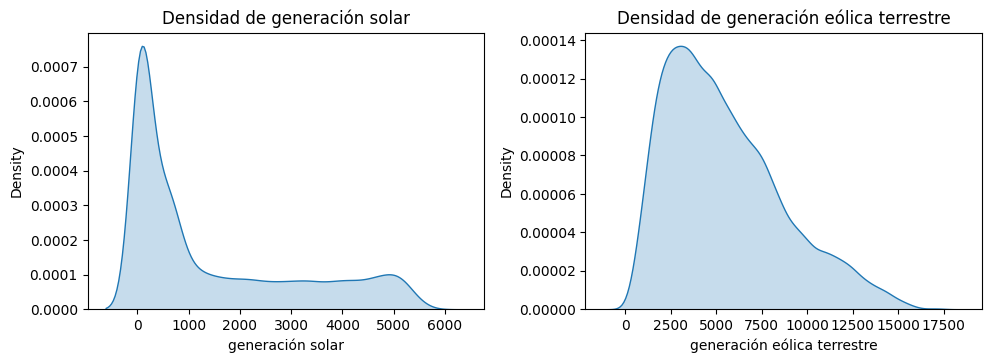

In [528]:
#Columnas de generación de energía renovable
renewable_columns = [

    'generación solar',

    'generación eólica terrestre',
 ]

# Crear gráficos de densidad para cada columna de generación renovable
plt.figure(figsize=(15, 10))
for i, column in enumerate(renewable_columns):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(df_renewable[column], fill=True)  #kdeplot para gráficos de densidad
    plt.title(f'Densidad de {column}')
plt.tight_layout()
plt.show()

Los gráficos de densidad muestran que tanto la generación solar como la eólica terrestre son fuentes de energía intermitentes con distribuciones sesgadas a la derecha. La generación solar tiende a tener valores atípicos más extremos, mientras que la generación eólica terrestre es más variable en general.

Aunque la generación eólica terrestre también tiene valores atípicos, estos tienden a ser menos extremos en comparación con la generación solar.

## Energia Fosil


Estadísticas descriptivas para la generación de energía fósil:
       generación fósil carbón pardo/lignito  \
count                           35064.000000   
mean                              448.090492   
std                               354.480256   
min                                 0.000000   
25%                                 0.000000   
50%                               509.000000   
75%                               757.000000   
max                               999.000000   

       generación fósil gas derivado del carbón  generación fósil gas  \
count                                   35064.0          35064.000000   
mean                                        0.0           5622.401894   
std                                         0.0           2201.315046   
min                                         0.0              0.000000   
25%                                         0.0           4127.000000   
50%                                         0.0           4969.000

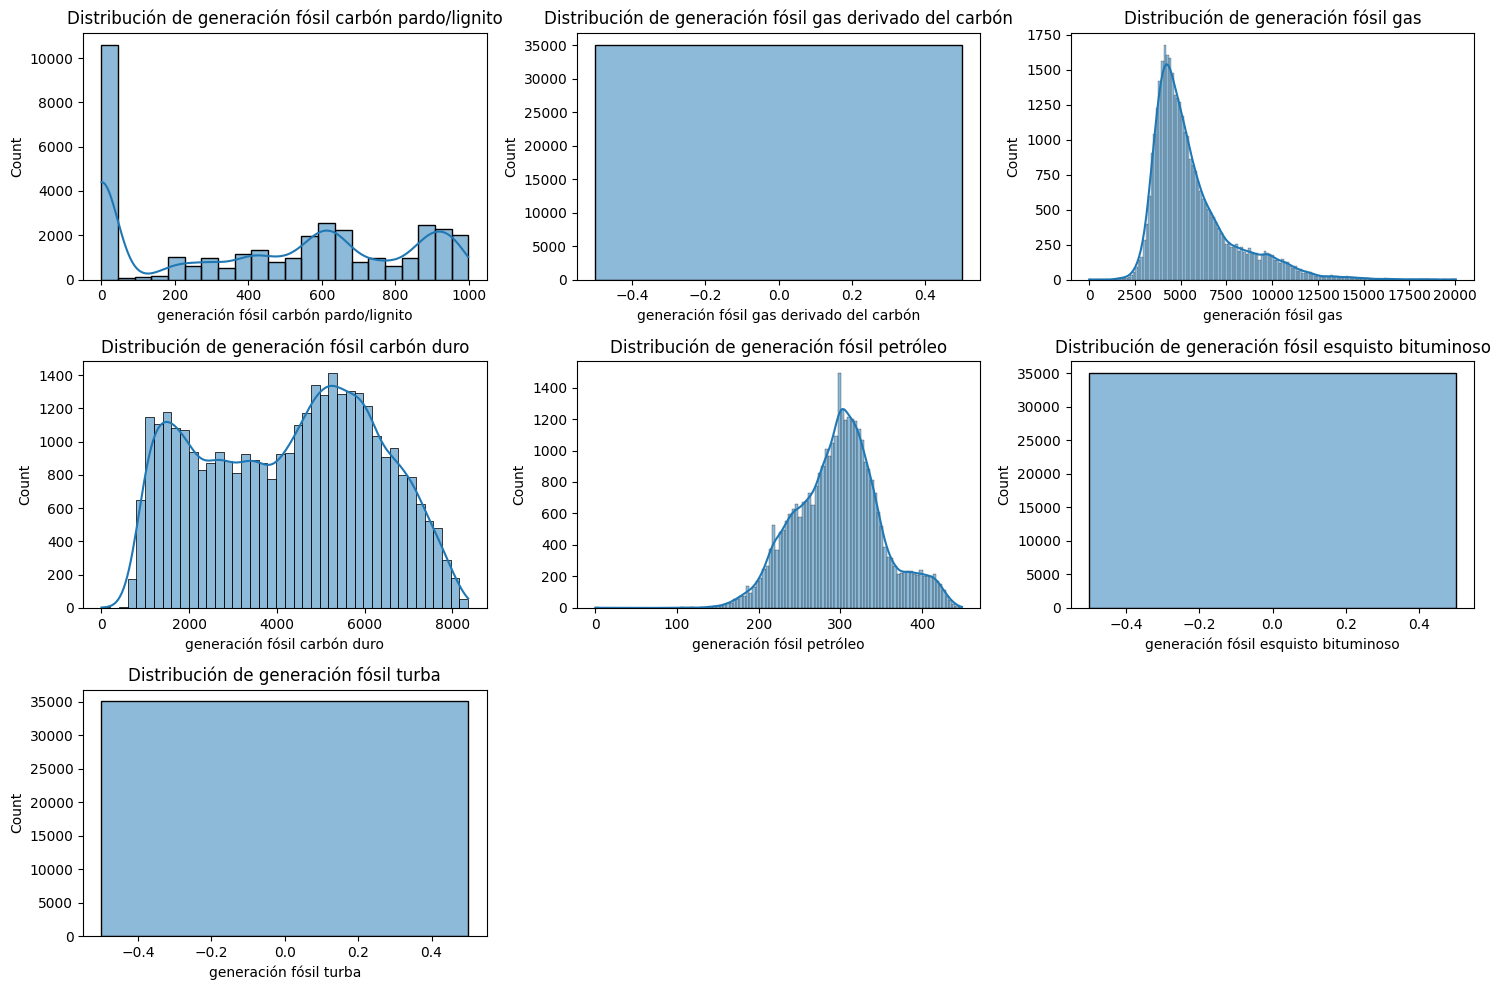

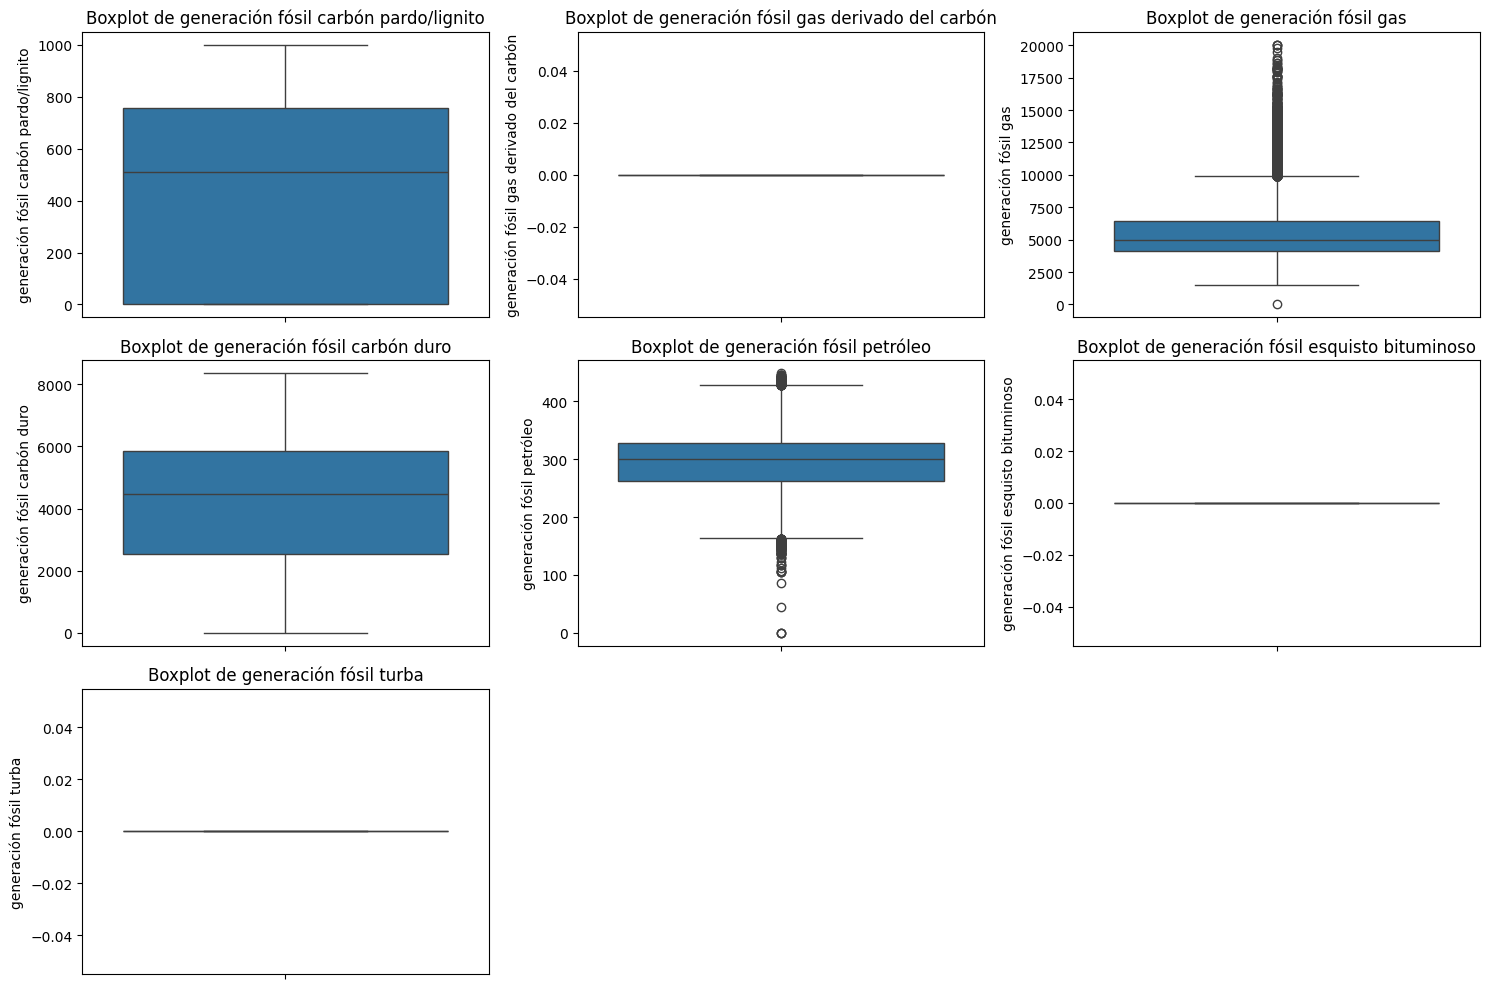

In [529]:
# Columnas de generación de energía fósil
fossil_columns = [
    'generación fósil carbón pardo/lignito',
    'generación fósil gas derivado del carbón',
    'generación fósil gas',
    'generación fósil carbón duro',
    'generación fósil petróleo',
    'generación fósil esquisto bituminoso',
    'generación fósil turba'
]

# Calcular estadísticas descriptivas para cada columna de generación fósil
descriptive_stats_fossil = df[fossil_columns].describe()

print("Estadísticas descriptivas para la generación de energía fósil:")
print(descriptive_stats_fossil)

#histogramas
plt.figure(figsize=(15, 10))
for i, column in enumerate(fossil_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

#boxplots para cada columna de generación fósil
plt.figure(figsize=(15, 10))
for i, column in enumerate(fossil_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

La generación constante en cero para el gas derivado del carbón, el esquisto bituminoso y de generacion fosil turba. Esto podría indicar que estas fuentes no están en uso, podria eliminarlas del modelo ya que no afectarian.

ME llama la atencion el sesgo extremo en la generación de gas, que sugiere una dependencia muy puntual de esta fuente de energía.y la distribución bimodal del carbón duro, ya que esto puede significar que hay dos maneras muy marcadas de utilizar este recurso.

generación de petróleo se distribuye de forma bastante uniforme cuando está activa. Hay algunos valores atípicos, pero no son extremos. Estos valores atípicos

## Comparacion de todos los Tipos de energia por consumo

<ipython-input-530-ef06081da5c4>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Generación Total', y='Energía', data=generation_df_sorted, palette='viridis')


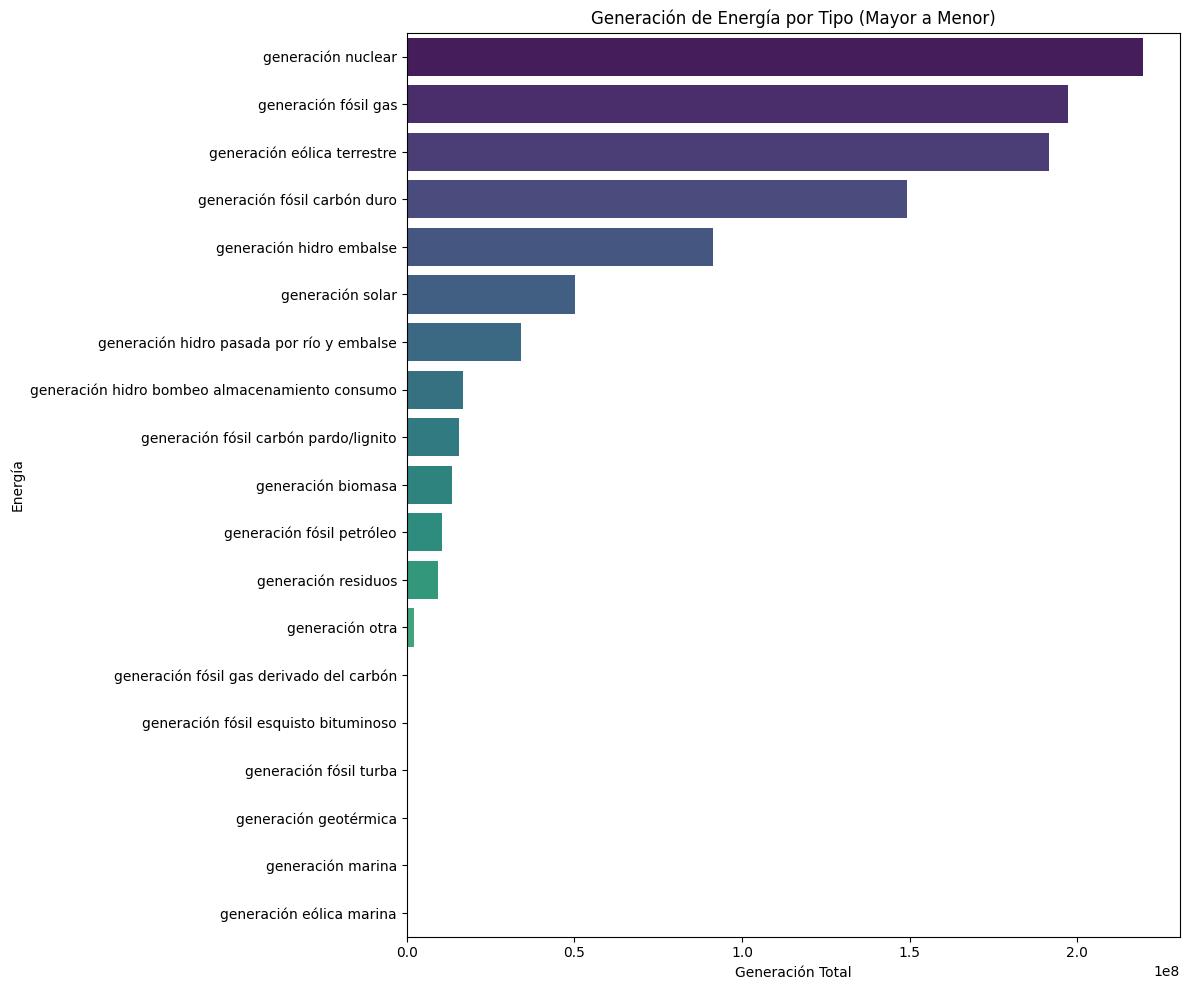

In [530]:
# Columnas de generación de energía
generation_columns = [
    'generación biomasa',
    'generación fósil carbón pardo/lignito',
    'generación fósil gas derivado del carbón',
    'generación fósil gas',
    'generación fósil carbón duro',
    'generación fósil petróleo',
    'generación fósil esquisto bituminoso',
    'generación fósil turba',
    'generación geotérmica',
    'generación hidro bombeo almacenamiento consumo',
    'generación hidro pasada por río y embalse',
    'generación hidro embalse',
    'generación marina',
    'generación nuclear',
    'generación otra',
    'generación solar',
    'generación residuos',
    'generación eólica marina',
    'generación eólica terrestre',

]

#generación total de cada tipo de energía
generation_totals = df[generation_columns].sum()

#DataFrame para facilitar la ordenación
generation_df = pd.DataFrame({'Energía': generation_totals.index, 'Generación Total': generation_totals.values})

#Ordenar de mayor a menor generación
generation_df_sorted = generation_df.sort_values(by='Generación Total', ascending=False)

#Crear el gráfico de barras horizontales con seaborn
plt.figure(figsize=(12, 10))
sns.barplot(x='Generación Total', y='Energía', data=generation_df_sorted, palette='viridis')
plt.title('Generación de Energía por Tipo (Mayor a Menor)')
plt.xlabel('Generación Total')
plt.ylabel('Energía')
plt.tight_layout()
plt.show()

La generación nuclear es la fuente de energía con mayor generación total en este conjunto de datos, superando significativamente a las demás. Los combustibles fósiles (gas, carbón duro, carbón pardo/lignito y petróleo) representan una parte importante de la generación de energía, con el gas fósil y el carbón duro como fuentes significativas.
Las energías renovables (eólica terrestre, solar, hidroeléctrica y biomasa) también contribuyen a la generación de energía, aunque en menor medida que la nuclear y los combustibles fósiles. En este punto determino que mi variable objtivo se centra en la energia Eolica

Top 5 de la generacion energia Fosil

Top 5 de energías fósiles más utilizadas:
                                    Energía  Generación Total
2                      generación fósil gas       197143900.0
3              generación fósil carbón duro       149238612.0
0     generación fósil carbón pardo/lignito        15711845.0
4                 generación fósil petróleo        10461300.0
1  generación fósil gas derivado del carbón               0.0


<ipython-input-531-97a435f15185>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Generación Total', y='Energía', data=top_5_fossil, palette='viridis')


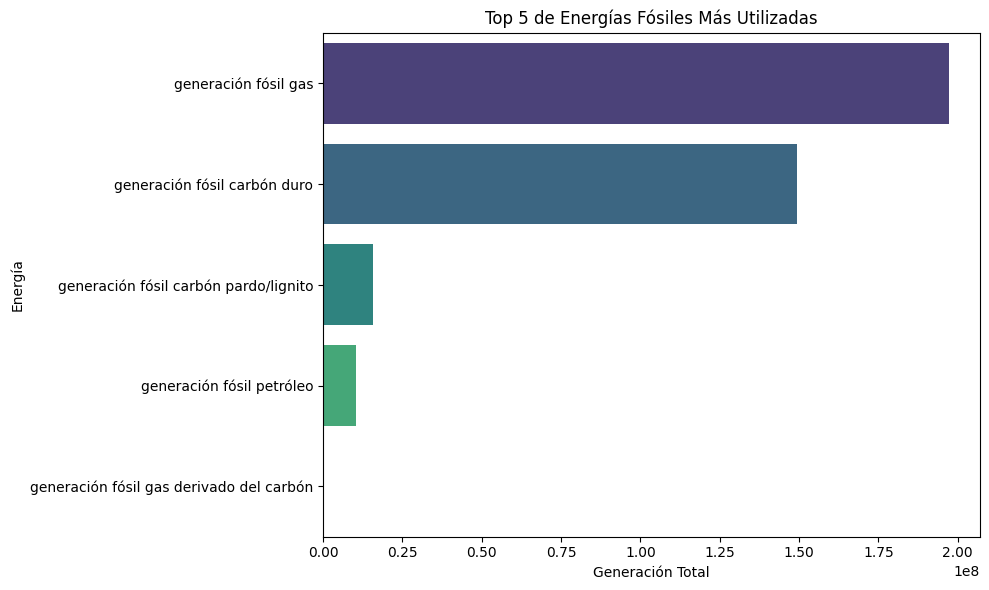

In [531]:
# Columnas de generación de energía fósil
fossil_columns = [
    'generación fósil carbón pardo/lignito',
    'generación fósil gas derivado del carbón',
    'generación fósil gas',
    'generación fósil carbón duro',
    'generación fósil petróleo',
    'generación fósil esquisto bituminoso',
    'generación fósil turba'
]

# Calcular la generación total de cada tipo de energía fósil
generation_totals_fossil = df[fossil_columns].sum()

# Crear un DataFrame para facilitar la ordenación
generation_df_fossil = pd.DataFrame({'Energía': generation_totals_fossil.index, 'Generación Total': generation_totals_fossil.values})

# Ordenar de mayor a menor generación
top_5_fossil = generation_df_fossil.nlargest(5, 'Generación Total')

print('Top 5 de energías fósiles más utilizadas:')
print(top_5_fossil)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Generación Total', y='Energía', data=top_5_fossil, palette='viridis')
plt.title('Top 5 de Energías Fósiles Más Utilizadas')
plt.xlabel('Generación Total')
plt.ylabel('Energía')
plt.tight_layout()
plt.show()

Hipotesis correcta, en las fuentes de Fosiles el fosil gas es la mas alta generación de energía, indica una dependencia significativa.
El carbón duro también juega un papel importante en la generación de energía, aunque en menor medida que el gas fósil.

#Analisis Bivariado

##Relacion entre PRevision y carga Real

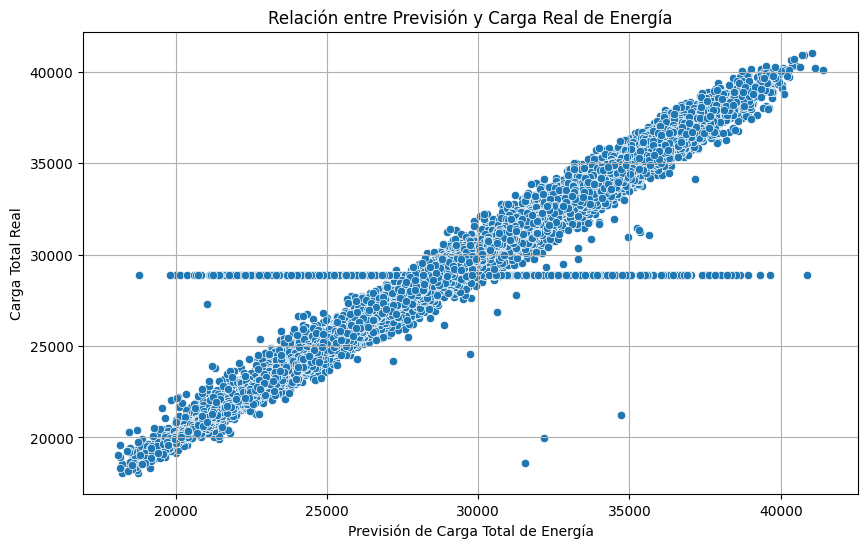

In [532]:
#  columnas tengan los nombres correctos
prevision_columna = 'previsión de carga total'
carga_real_columna = 'carga total real'

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[prevision_columna], y=df[carga_real_columna])

# Personalización del gráfico
plt.title('Relación entre Previsión y Carga Real de Energía')
plt.xlabel('Previsión de Carga Total de Energía')
plt.ylabel('Carga Total Real')
plt.grid(True)
plt.show()


 A medida que aumenta la previsión de carga, la carga real también tiende a aumentar, y viceversa. Es decir mi hipotesis es valida
 Se pueden observar algunos valores atípicos, especialmente en los extremos del rango de datos. Sin embargo, la tendencia general sigue siendo claramente lineal.

## Comparacion de las energias por año y por mes

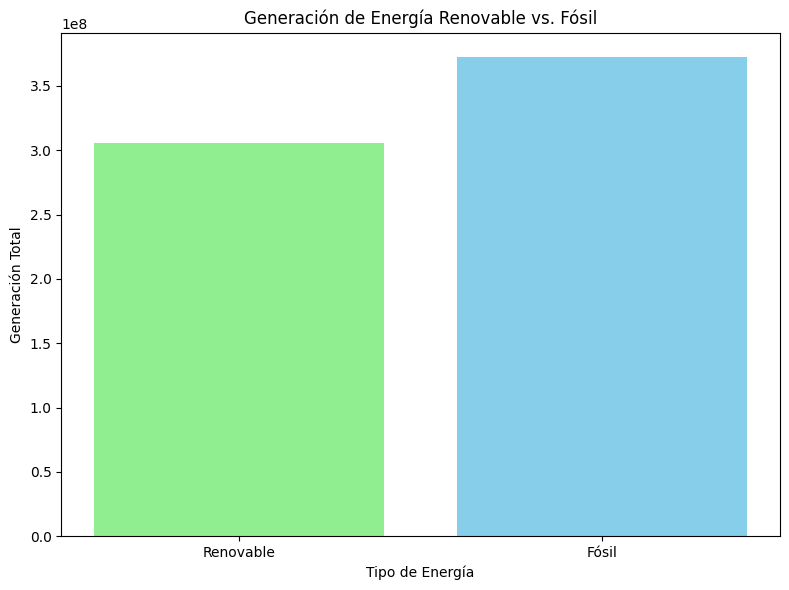

In [533]:
#codigo para comparar en general cual es la que mas se utiliza se espera que sea fosil, comparo por año
# Columnas de generación de energía renovable
renewable_columns = [
    'generación biomasa',
    'generación geotérmica',
    'generación hidro bombeo almacenamiento consumo',
    'generación hidro pasada por río y embalse',
    'generación solar',
    'generación eólica marina',
    'generación eólica terrestre',

]

# Columnas de generación de energía fósil
fossil_columns = [
    'generación fósil carbón pardo/lignito',
    'generación fósil gas derivado del carbón',
    'generación fósil gas',
    'generación fósil carbón duro',
    'generación fósil petróleo',
    'generación fósil esquisto bituminoso',
    'generación fósil turba'
]

# Crear copias de los DataFrames originales
df_renewable = df.copy()
df_fossil = df.copy()

# Calcular la generación total de energía renovable y fósil
total_renewable = df_renewable[renewable_columns].sum().sum()
total_fossil = df_fossil[fossil_columns].sum().sum()

# Crear un DataFrame para el gráfico de barras apiladas
data = {'Energía': ['Renovable', 'Fósil'], 'Generación Total': [total_renewable, total_fossil]}
df_plot = pd.DataFrame(data)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(8, 6))
plt.bar(df_plot['Energía'], df_plot['Generación Total'], color=['lightgreen', 'skyblue'])
plt.title('Generación de Energía Renovable vs. Fósil')
plt.xlabel('Tipo de Energía')
plt.ylabel('Generación Total')
plt.tight_layout()
plt.show()

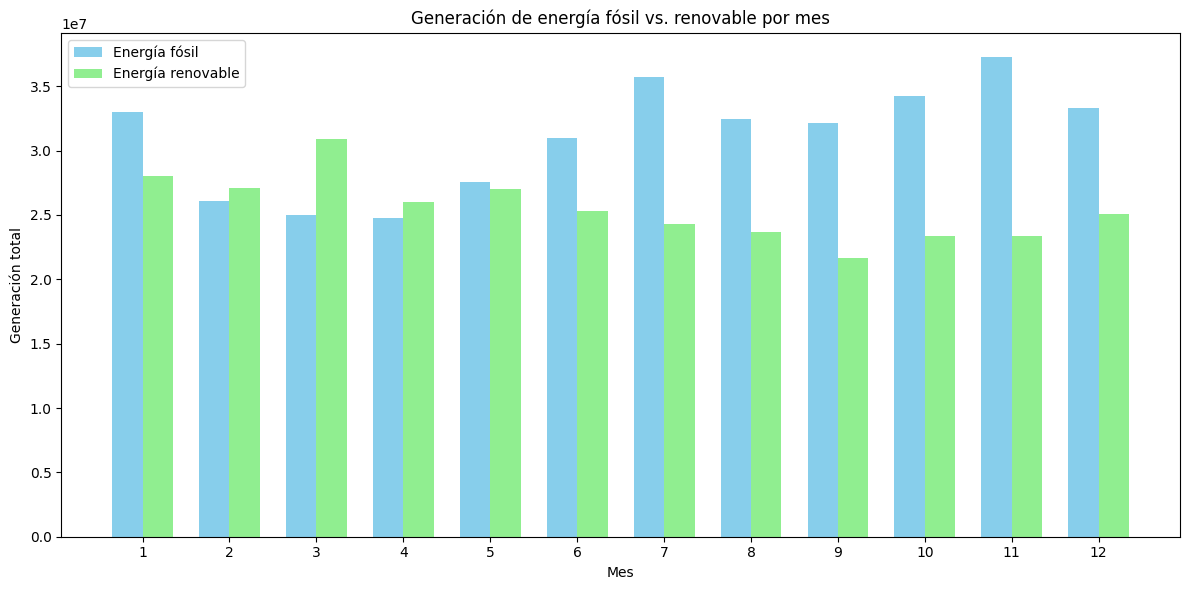

In [534]:
#Comparo las energias utilizadas por mes segun su origen.
# Columnas de generación de energía fósil
fossil_columns = [
    'generación fósil carbón pardo/lignito',
    'generación fósil gas derivado del carbón',
    'generación fósil gas',
    'generación fósil carbón duro',
    'generación fósil petróleo',
    'generación fósil esquisto bituminoso',
    'generación fósil turba'
]

# Columnas de generación de energía renovable
renewable_columns = [
    'generación biomasa',
    'generación geotérmica',
    'generación hidro bombeo almacenamiento consumo',
    'generación hidro pasada por río y embalse',
    'generación solar',
    'generación eólica marina',
    'generación eólica terrestre',

]

# Crear copias de los DataFrames originales
df_monthly_fossil = df.copy()
df_monthly = df.copy()

# Extraer el mes de la columna 'tiempo'
# Convert 'tiempo' to datetime before extracting the month
df_monthly_fossil['tiempo'] = pd.to_datetime(df_monthly_fossil['tiempo'])
df_monthly_fossil['mes'] = df_monthly_fossil['tiempo'].dt.month

df_monthly['tiempo'] = pd.to_datetime(df_monthly['tiempo'])
df_monthly['mes'] = df_monthly['tiempo'].dt.month


# Calcular la generación total de energía fósil y renovable por mes
df_monthly_fossil['generación fósil total'] = df_monthly_fossil[fossil_columns].sum(axis=1)
df_monthly['generación renovable total'] = df_monthly[renewable_columns].sum(axis=1)

# Agrupar por mes y sumar la generación
monthly_fossil_generation = df_monthly_fossil.groupby('mes')['generación fósil total'].sum()
monthly_generation = df_monthly.groupby('mes')['generación renovable total'].sum()

# Crear el gráfico de barras comparativo
plt.figure(figsize=(12, 6))

bar_width = 0.35
r1 = np.arange(len(monthly_fossil_generation.index))
r2 = [x + bar_width for x in r1]

plt.bar(r1, monthly_fossil_generation.values, color='skyblue', width=bar_width, label='Energía fósil')
plt.bar(r2, monthly_generation.values, color='lightgreen', width=bar_width, label='Energía renovable')

plt.xlabel('Mes')
plt.ylabel('Generación total')
plt.title('Generación de energía fósil vs. renovable por mes')
plt.xticks([r + bar_width / 2 for r in range(len(monthly_fossil_generation.index))], monthly_fossil_generation.index)
plt.legend()
plt.tight_layout()
plt.show()


Este gráfico nos presenta una visión clara de la dinámica entre la generación de energía fósil y renovable a lo largo del año. Observamos que, si bien la energía fósil mantiene una producción relativamente constante, la energía renovable muestra una variabilidad significativa.

Esta variabilidad en la generación renovable es un punto crítico para los planificadores de políticas energéticas. La transición hacia un sistema energético sostenible depende en gran medida de nuestra capacidad para integrar fuentes de energía renovable de manera eficiente

##Relacion entre generacion solar y generacion eolica

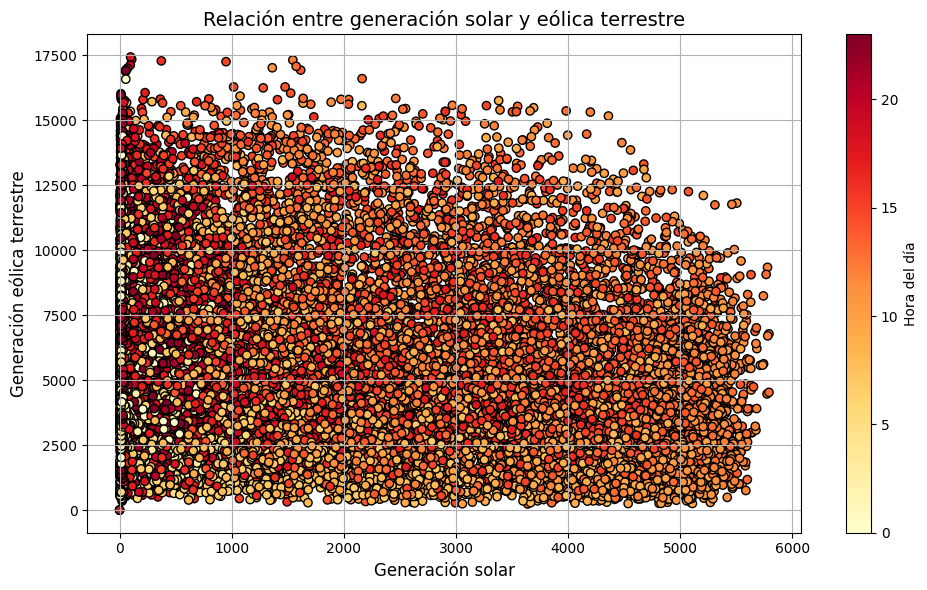

In [535]:
# Extrae la hora del día (si es necesario)
df['hora'] = df['tiempo'].dt.hour

#  Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['generación solar'], df['generación eólica terrestre'], c=df['hora'], cmap=cm.YlOrRd, edgecolor='black')
plt.xlabel('Generación solar', fontsize=12)
plt.ylabel('Generación eólica terrestre', fontsize=12)
plt.title('Relación entre generación solar y eólica terrestre', fontsize=14)
plt.colorbar(label='Hora del día')
plt.grid(True)
plt.tight_layout()
plt.show()



En este grafico observamos:

- Los puntos no se agrupan a lo largo de una línea recta ascendente o descendente. Esto sugiere que la relación entre la generación solar y eólica no es directamente proporcional en todos los momentos del día.

- Los colores nos muestran que la hora del día influye en la generación de energía. Los puntos amarillos (amanecer) se concentran más en la parte inferior, lo que indica que la generación eólica es baja en esas horas, aunque la solar pueda estar aumentando.Los puntos rojos (atardecer) se distribuyen más ampliamente, sugiriendo que la generación eólica puede variar más a lo largo del día.

- La relación entre ambas energías parece ser más compleja y estar influenciada por otros factores, como la hora del día. Hipotesis rechazada

- No hay una correlación positiva clara y consistente entre la generación solar y eólica en todos los momentos del día se rechaza la hipotesis.

existe una correlacion entre la  generación de energía solar y la generación de energía eólica terrestre, donde los días con mayor generación solar también tienden a tener mayor generación eólica.


## Matriz de correlacion

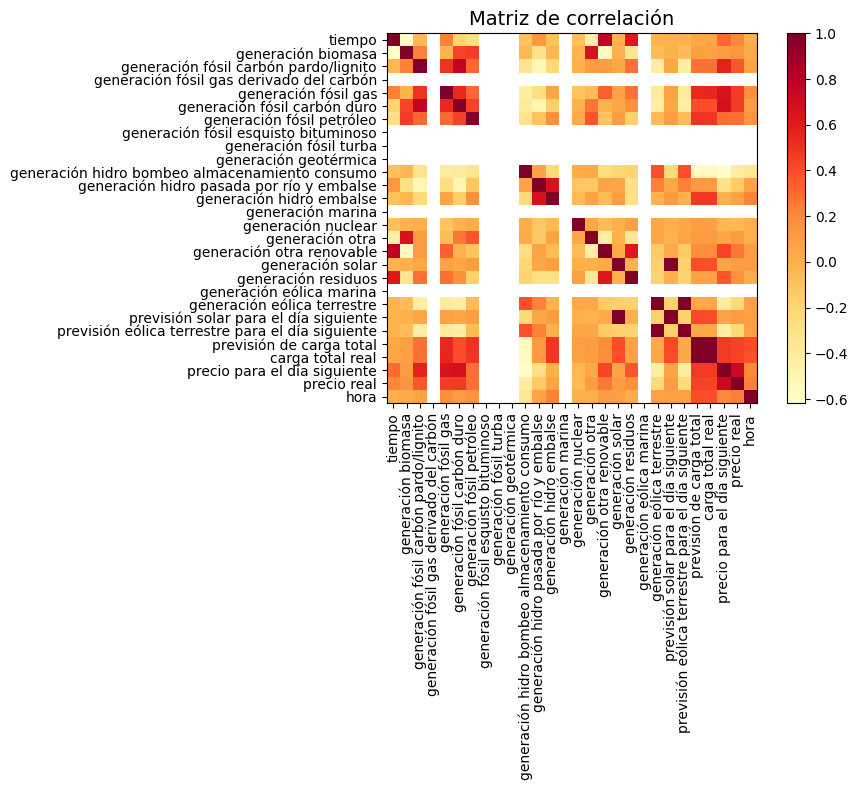

In [536]:
#Mapa de calor
plt.figure(figsize=(10, 8))
plt.imshow(df.corr(), cmap=cm.YlOrRd, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.title('Matriz de correlación', fontsize=14)
plt.tight_layout()
plt.show()

La matriz muestra que la demanda de energía en una ciudad está influenciada por dos factores principales, la prevision de la demanda y la hora del dia.

La demanda tiende a ser menor durante la noche y mayor durante el día

Esta información puede ser muy útil para las empresas de energía y los responsables de la planificación energética. Por ejemplo, pueden utilizar la previsión de la demanda y la hora del día para anticipar los picos de consumo y ajustar la producción de energía en consecuencia. También pueden utilizar esta información para diseñar campañas de ahorro de energía más efectivas, dirigidas a las horas del día en que el consumo es más alto

Correlaciones mas significativas

Carga total real vs. Previsión de carga total, existe una fuerte correlación positiva, lo que indica que las previsiones de carga total tienden a ser precisas.
Precio real vs. Precio para el día siguiente; También hay una fuerte correlación positiva, lo que sugiere que los precios del día siguiente están bien previstos.

Generación eólica terrestre vs. Previsión eólica terrestre para el día siguiente, Una correlación positiva significativa indica que las previsiones de energía eólica tienen cierta precisión. Hora vs. Generación eólica terrestre, hay una correlación negativa, lo que podría indicar que la generación eólica tiende a ser menor en ciertas horas del día al igual que la energia solar.
La correlación positiva entre la generación eólica terrestre y su previsión sugiere que es posible desarrollar modelos de predicción precisos.

Generación fósil (gas, carbón, petróleo): Hay una correlación positiva notable entre los diferentes tipos de generación fósil, lo que sugiere que tienden a variar juntos.
Generación solar vs. Previsión solar para el día siguiente: Igual que en el caso de la eólica, se observa una relación positiva.

 Las correlaciones son relativamente débiles, es decir no hay una relación lineal fuerte directa entre la generación renovable y la fósil.
  la variable tiempo no presenta una correlacion fuerte con ninguna de las otras variables.
  La generación nuclear presenta una baja correlación con el resto de variables.



#Analisis Multivariado

Me estaria costando no me ejecuta bien el codigo. Calculo sera un tema de los formatos

In [ ]:

# Convierte la columna 'tiempo' a datetime
df['tiempo'] = pd.to_datetime(df['tiempo'], errors='coerce')

#Calcula la generación fósil total (maneja posibles errores)
cols_fosil = ['generación fósil carbón pardo/lignito', 'generación fósil gas derivado del carbón',
              'generación fósil gas', 'generación fósil carbón duro', 'generación fósil petróleo',
              'generación fósil esquisto bituminoso', 'generación fósil turba']
df['generación fósil total'] = df[cols_fosil].sum(axis=1, skipna=True)

# Calcula la generación renovable total (maneja posibles errores)
cols_renovables = ['generación biomasa', 'generación geotérmica', 'generación hidro bombeo almacenamiento consumo',
                    'generación hidro pasada por río y embalse', 'generación hidro embalse', 'generación marina',
                    'generación solar', 'generación residuos', 'generación eólica marina', 'generación eólica terrestre',
]

df['generación renovable total'] = df[cols_renovables].sum(axis=1, skipna=True)

# Define las variables para el gráfico
tiempo = df['tiempo']
demanda = df['carga total real']
generacion_fosil = df['generación fósil total']
generacion_renovable = df['generación renovable total']

# Crea el gráfico de líneas apiladas
plt.figure(figsize=(12, 6))

plt.plot(tiempo, demanda, label='Demanda total', color='black', linewidth=2)
plt.plot(tiempo, generacion_fosil, label='Generación fósil total', color='red', linewidth=2)
plt.plot(tiempo, generacion_renovable, label='Generación renovable total', color='green', linewidth=2)

plt.xlabel('Tiempo')
plt.ylabel('Energía (MW)')
plt.title('Evolución de la demanda y generación de energía')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

El gráfico proporciona una visión general de la relación entre la demanda de energía y la generación de energía (fósil y renovable) a lo largo del tiempo.La demanda de energía (línea negra) presenta una variación a lo largo del tiempo, con picos más altos en ciertas épocas del año (posiblemente en invierno y verano, dependiendo de la región).

La generación de energía fósil (línea roja) muestra una tendencia similar a la demanda, lo que sugiere que se utiliza para satisfacer los picos de demanda

La generación de energía renovable (línea verde) también muestra variaciones a lo largo del tiempo, pero no parece seguir la misma tendencia que la demanda. Esto podría indicar que su producción depende de factores como las condiciones climáticas (solar, viento, etc.).


# Modelo de Regresión Lineal Múltiple

Prediccion de generación de energía eólica terrestre utilizando modelo de regresión lineal múltiple.

La generación de energía eólica tiende a tener patrones y dependencias temporales. Los valores de generación de días anteriores (características de rezago) pueden proporcionar información valiosa para predecir la generación futura.
La regresión lineal múltiple es capaz de modelar la relación lineal entre la generación actual y los valores de generación pasados.

In [ ]:
# Asegúrate de que 'df' es tu DataFrame con la columna 'tiempo'

# 1. Convierte la columna 'tiempo' a datetime64
df['tiempo'] = pd.to_datetime(df['tiempo'], utc=True)

# 2. Establecer 'tiempo' como índice
df.set_index('tiempo', inplace=True)

In [ ]:

# Calcula el número de filas que representan aproximadamente 3 meses
# Frecuencia diaria, 3 meses por 90 días
lag_period = 90
for i in range(1, lag_period + 1):
    df[f'eolica_lag_{i}'] = df['generación eólica terrestre'].shift(i)

# Eliminar filas con NaN generados por el lag
df.dropna(inplace=True)

# Variables predictoras y objetivo
features_regresion = [f'eolica_lag_{i}' for i in range(1, lag_period + 1)]  # Variables predictoras
target_regresion = 'generación eólica terrestre'  # Variable objetivo

X_regresion = df[features_regresion]
y_regresion = df[target_regresion]

# Dividir en entrenamiento y prueba
X_train_regresion, X_test_regresion, y_train_regresion, y_test_regresion = train_test_split(
    X_regresion, y_regresion, test_size=0.2, random_state=42, shuffle=False
)  # Mantiene el orden original de los datos


# Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_regresion)
X_test_scaled = scaler.transform(X_test_regresion)



In [ ]:
# Crear y entrenar el modelo con intercepto (fit_intercept=True es el valor predeterminado)
modelo = LinearRegression()  # No necesitamos especificar fit_intpt=Trerceue
modelo.fit(X_train_regresion, y_train_regresion)

In [ ]:
# Now you can access the intercept
modelo.intercept_

Esto significa que, según el modelo, cuando todas las variables predictoras son cero, la variable objetivo tiene un valor de aproximadamente 145.08.

In [ ]:
# Realizar predicciones
y_pred = modelo.predict(X_test_regresion)

In [ ]:
#Evaluar el modelo
mse = mean_squared_error(y_test_regresion, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_regresion, y_pred)
mae = mean_absolute_error(y_test_regresion, y_pred)  # Calcula el MAE

print(f"Modelo - MSE: {mse}, RMSE: {rmse}, R2: {r2}, MAE: {mae}")

In [ ]:
#Crear un DataFrame de comparación
comparacion_df = pd.DataFrame({'Real': y_test_regresion, 'Predicho': y_pred})
print("\nDataFrame de comparación:")
print(comparacion_df.head(10))  # Muestra las primeras 10 filas para dar una idea

In [ ]:
#Graficar las predicciones vs. valores reales
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico
plt.plot(y_test_regresion.index, y_test_regresion, label='Valores reales')
plt.plot(y_test_regresion.index, y_pred, label='Predicciones')
plt.xlabel('Índice de tiempo')
plt.ylabel('Generación eólica terrestre')
plt.title('Predicciones vs. Valores reales')
plt.legend()
plt.show()

#Conclusiones

Conclusiones, Alto R2 (0.96) este valor indica que el modelo explica el 96% de la variabilidad en la generación eolica terrestre, lo que sugiere un ajuste muy bueno a los datos. RMSE y MAE representan la magnitud del error de predicción. El RMSE es ligeramente mayor que el MAE, lo que indica que hay algunos errores grandes en las predicciones. Sin embargo, en general, los errores son relativamente bajos en comparación con la escala de la variable objetivo.

Ajuste Visual El gráfico muestra que las predicciones del modelo siguen de cerca la tendencia de los valores reales, lo que respalda el buen rendimiento del modelo. -el modelo captura la tendencia general de la generación eólica terrestre y puede ser útil para realizar predicciones, aunque se podrían explorar mejoras para reducir los errores.

 El uso de características de rezago de 3 meses parece ser efectivo para capturar la dependencia temporal en la generación eólica terrestre. tomando los coeficientes que mejor se ajustan a los datos históricos y luego utiliza estos coeficientes para hacer predicciones sobre la generación eólica futura.

#Analisis Final

Como futura Data Science en este proyecto, mi viaje comenzó con una pregunta simple: ¿cómo podemos predecir mejor la generación de energia renovable?

 Necesitaba entender el panorama general, en prinicipio pense que la energia solar era la que mas contribuia como energia renovable pero para mi sorpresa fue la Energia Eolica.
 Analicé la matriz de correlación, buscando relaciones entre las diferentes variables energéticas, descubrí que la generación eólica estaba fuertemente correlacionada con su previsión, lo que me dio una pista sobre la importancia de las previsiones existentes.
 Comprendí que la predicción eólica es una pieza clave en la transición hacia un sistema energético sostenible.

 Luego, profundicé en el comportamiento de la energía renovable. Analicé la producción mensual, comparándola con la generación fósil. Vi que la energía renovable era mucho más variable, lo que subrayó la necesidad de predicciones precisas para integrar esta fuente de energía de manera eficiente.

 Los planificadores de políticas energéticas necesitan herramientas que les permitan integrar la energía eólica de manera eficiente, y los operadores de la red necesitan anticipar la disponibilidad de energía eólica para mantener el equilibrio entre la oferta y la demanda.

Mi trabajo, por humilde que sea, es un pequeño paso en esta dirección. Al demostrar que la información histórica y los patrones diurnos mejoran la precisión de la predicción eólica, espero contribuir a la creación de modelos más robustos que faciliten la integración de esta fuente de energía limpia.

En última instancia, mi objetivo es que mis modelos ayuden a construir un futuro energético más sostenible, donde la energía eólica juegue un papel protagonista."